# Artificial Intelligence Computer Vision & Classifier
## Generative AI (GenAI) - 004
### Harmful Species Identification (Spotted Lantern Fly vs. Asian Longhorn Beetle)

<center>
<table align="center">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/christophergarthwood/jbooks/blob/main/STEM-004_ComputerVision.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/notebooks?referrer=search&hl=en&project=usfs-ai-bootcamp">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Link to Colab Enterprise
    </a>
  </td>   
  <td style="text-align: center">
    <a href="https://github.com/christophergarthwood/jbooks/blob/main/STEM-004_ComputerVision.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/instances?referrer=search&hl=en&project=usfs-ai-bootcamp">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Link to Vertex AI Workbench
    </a>
  </td>
</table>
</center>
</br></br></br>

| | |
|-|-|
|Author(s) | [Christopher G Wood](https://github.com/christophergarthwood)  |

# Overview

Using a Convolutional Neural Network (CNN) architecture we will read in images for two invasive species and train a model on that data to produce a saved neural layer / model.  We will reload that model and make inferences (predictions) against test data and measure accuracy with various methods.

## What is a convolutional neural network (CNN)?

A convolutional neural network (CNN) is a category of machine learning model, namely a type of deep learning algorithm well suited to analyzing visual data. CNNs -- sometimes referred to as convnets -- use principles from linear algebra, particularly convolution operations, to extract features and identify patterns within images. Although CNNs are predominantly used to process images, they can also be adapted to work with audio and other signal data.

CNN architecture is inspired by the connectivity patterns of the human brain -- in particular, the visual cortex, which plays an essential role in perceiving and processing visual stimuli. The artificial neurons in a CNN are arranged to efficiently interpret visual information, enabling these models to process entire images. Because CNNs are so effective at identifying objects, they are frequently used for computer vision tasks such as image recognition and object detection, with common use cases including self-driving cars, facial recognition and medical image analysis.

Unlike CNNs, older forms of neural networks often needed to process visual data in a piecemeal manner, using segmented or lower-resolution input images. A CNN's comprehensive approach to image recognition lets it outperform a traditional neural network on a range of image-related tasks and, to a lesser extent, speech and audio processing.

### How do convolutional neural networks work?
CNNs use a series of layers, each of which detects different features of an input image. Depending on the complexity of its intended purpose, a CNN can contain dozens, hundreds or even thousands of layers, each building on the outputs of previous layers to recognize detailed patterns.


## References:


+ https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats
+ https://pythonawesome.com/an-animated-and-smart-progress-bar-for-python/
+ https://www.tensorflow.org/tutorials/images/cnn
+ https://www.geeksforgeeks.org/computer-vision/
+ https://www.machinelearningnuggets.com/cnn-tensorflow/
+ https://www.datacamp.com/tutorial/cnn-tensorflow-python
+ https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
+ https://www.baeldung.com/cs/ml-loss-accuracy
+ https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew
+https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

In [ ]:
# Let's define some variables (information holders) for our project overall

global PROJECT_ID, BUCKET_NAME, LOCATION
BUCKET_NAME ="cio-training-vertex-colab"
PROJECT_ID  ="usfs-gcp-rand-test-3 "
LOCATION    = "us-central1"

BOLD_START="\033[1m"
BOLD_END="\033[0m"

In [ ]:
# Now create a means of enforcing project id selection

import ipywidgets as widgets
from IPython.display import display

def wait_for_button_press():

    button_pressed = False

    # Create widgets
    html_widget = widgets.HTML(

    value="""
        <center><table><tr><td><h1 style="font-family: Roboto;font-size: 24px"><b>&#128721; &#9888;&#65039; WARNING &#9888;&#65039;	&#128721; </b></h1></td></tr></table</center></br></br>

        <table><tr><td>
            <span style="font-family: Tahoma;font-size: 18">
              This notebook was designed to work in Jupyter Notebook or Google Colab with the understnading that certain permissions might be enabled.</br>
              Please verify that you are in the appropriate project and that the:</br>
              <center><code><b>PROJECT_ID</b></code> </br></center>
              aligns with the Project Id in the upper left corner of this browser and that the location:
              <center><code><b>LOCATION</b></code> </br></center>
              aligns with the instructions provided.
            </span>
          </td></tr></table></br></br>

    """)

    project_list=["usfs-ai-bootcamp", "usfa-ai-advanced-training", "I will setup my own"]
    dropdown = widgets.Dropdown(
        options=project_list,
        value=project_list[0],
        description='Set Your Project:',
    )

    html_widget2 = widgets.HTML(
    value="""
        <center><table><tr><td><h1 style="font-family: Roboto;font-size: 24px"><b>&#128721; &#9888;&#65039; WARNING &#9888;&#65039;	&#128721; </b></h1></td></tr></table</center></br></br>
          """)

    button = widgets.Button(description="Accept")

    # Function to handle the selection change
    def on_change(change):
        global PROJECT_ID
        if change['type'] == 'change' and change['name'] == 'value':
            #print("Selected option:", change['new'])
            PROJECT_ID=change['new']

    # Observe the dropdown for changes
    dropdown.observe(on_change)

    def on_button_click(b):
        nonlocal button_pressed
        global PROJECT_ID
        button_pressed = True
        #button.disabled = True
        button.close()  # Remove the button from display
        with output:
          #print(f"Button pressed...continuing")
          #print(f"Selected option: {dropdown.value}")
          PROJECT_ID=dropdown.value

    button.on_click(on_button_click)
    output = widgets.Output()

    # Create centered layout
    centered_layout = widgets.VBox([
                                    html_widget,
                                    widgets.HBox([dropdown, button]),
                                    html_widget2,
    ], layout=widgets.Layout(
                              display='flex',
                              flex_flow='column',
                              align_items='center',
                              width='100%'
    ))
    # Display the layout
    display(centered_layout)


wait_for_button_press()

## Environment Check

In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Google Colab Check
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import datetime

RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())
current_time   = datetime.datetime.now()

if RunningInCOLAB:
    print(f"You are running this notebook in Google Colab at {current_time} in the {PROJECT_ID} lab.")
else:
    print(f"You are likely running this notebook with Jupyter iPython runtime at {current_time} in the {PROJECT_ID} lab.")

You are likely running this notebook with Jupyter iPython runtime at 2025-01-20 21:50:13.957425 in the usfs-gcp-rand-test-3  lab.


# Library Management

In [ ]:
# Import key libraries necessary to support dynamic installation of additional libraries
import sys
# Use subprocess to support running operating system commands from the program, using the "bang" (!)
# symbology is supported, however that does not translate to an actual python script, this is a more
# agnostic approach.
import subprocess
import importlib.util

In [ ]:
libraries=["keras", "imageio", "seaborn", "alive-progress", "numpy", "Pillow", "numba", "tensorrt"]
#"tf-keras",

# Identify the libraries you'd like to add to this Runtime environment.
libraries=["backoff", "nltk", "bs4", "wordcloud", "pathlib", "numpy", "Pillow", "pandas",
           "python-dotenv", "seaborn", "rich", "rich[jupyter]", "piexif", "PyMuPDF","unidecode",
           "spacy", "gensim", "cluestar", "watermark", "watermark[GPU]", "scattertext",
           "keras", "imageio","numpy", "tensorrt", "pydot",
           ]

# Loop through each library and test for existence, if not present install quietly
for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"], check=True)
    else:
      print("Library " + library + " already installed.")

Library backoff already installed.
Library nltk already installed.
Library bs4 already installed.
Library wordcloud already installed.
Library pathlib already installed.
Library numpy already installed.
Library Pillow already installed.
Library pandas already installed.
Installing library python-dotenv
Library seaborn already installed.
Library rich already installed.
Installing library rich[jupyter]
Library piexif already installed.
Installing library PyMuPDF
Library unidecode already installed.
Library spacy already installed.
Library gensim already installed.
Library cluestar already installed.
Library watermark already installed.
Installing library watermark[GPU]
Library scattertext already installed.
Library keras already installed.
Library imageio already installed.
Library numpy already installed.
Library tensorrt already installed.
Library pydot already installed.


## Libraries

In [ ]:
#- Import additional libraries that add value to the project related to NLP

# Beautiful Soup (BS4) is used to parse HTML documents.
from bs4 import BeautifulSoup

# Word cloud building library
from wordcloud import WordCloud, STOPWORDS

#- Set of libraries that perhaps should always be in Python source
import backoff
import datetime
from dotenv import load_dotenv
import gc
import getopt
import glob
import inspect
import io
import itertools
import json
import math
import os
from pathlib import Path
import pickle
import platform
import random
import re
import shutil
import string
from io import StringIO
import subprocess
import socket
import sys
import textwrap
import tqdm
import traceback
import warnings
import time
from time import perf_counter
from rich import print as rprint
from rich.console import Console
from rich.traceback import install
import locale

#- Displays system info
from watermark import watermark as the_watermark
from py3nvml import py3nvml

#- Additional libraries for this work
import math
from base64 import b64decode
from IPython.display import Image, Markdown
import pandas, IPython.display as display, io, jinja2, base64
from IPython.display import clear_output #used to support real-time plotting
import requests
import unidecode
import pydot

#- Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

#- Graphics
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)
from matplotlib.pyplot import imshow
from matplotlib.patches import Circle
from PIL import Image as PIL_Image
import PIL.ImageOps
import matplotlib.image as mpimg
from imageio import imread

#- Image meta-data for Section 508 compliance
import piexif
from piexif.helper import UserComment

#- Progress bar
from tqdm import tqdm

# Tensorflow and related AI libraries
import tensorflow as tf
from tensorflow import data as tf_data
from tensorflow import keras
import tensorrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# existing pre-trained model
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.utils import to_categorical

#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

# progress bar
from tqdm.notebook import trange, tqdm

# Setup some basic timers material
from time import perf_counter

## Application Variables

In [ ]:
# Semantic Versioning
VERSION_NAME    = "MLCNN"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1

# API Parameters for things like WordCloud, variables help hold information for later use
# The "constants" represent variables that we don't anticipate changing over the course of the program.
IMG_BACKGROUND="black"     #options are black, white, another color or None
IMG_FONT_SIZE_MIN=10
IMG_WIDTH=1024
IMG_HEIGHT=768
IMG_INTERP="bilinear"
IMG_ALPHA=0.8
IMG_ASPECT="equal"
FIGURE_WIDTH=11
FIGURE_HEIGHT=8.5
WORD_FREQ=10

# specify how image formats will be saved
IMG_EXT=".jpg"

# used to fully display the error stack, set to 1 if you want to see a ridiculous amount of debugging information
DEBUG_STACKTRACE=0

# location of our working files
#WORKING_FOLDER="/content/folderOnColab"
WORKING_FOLDER="./folderOnColab"

# Notebook Author details
AUTHOR_NAME="Christopher G Wood"
GITHUB_USERNAME="christophergarthwood"
AUTHOR_EMAIL="christopher.g.wood@gmail.com"

# GenAI
BUFFER_SIZE = 60000
BATCH_SIZE = 256
TEXT_WIDTH=77
IMG_SCALE=0.75

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Encoding
ENCODING  ="utf-8"
os.environ['PYTHONIOENCODING']=ENCODING


# Artificial Intelligence Variables
BATCH_SIZE = 32
TRAIN_DATA_DIR=f"{WORKING_FOLDER}/ENTOMOLOGY/train"
VALIDATION_DATA_DIR=f"{WORKING_FOLDER}/ENTOMOLOGY/validation"
VALIDATION_SPLIT=0.2
IMG_HEIGHT=224
IMG_WIDTH=224
EPOCHS=50
BOLD_START = "\033[1m"
BOLD_END = "\033[0;0m"

METRICS = metrics=['accuracy',
                  	tf.keras.metrics.Precision(name='precision'),
                  	tf.keras.metrics.Recall(name='recall')]

#You can also adjust the verbosity by changing the value of TF_CPP_MIN_LOG_LEVEL:
#
#0 = all messages are logged (default behavior)
#1 = INFO messages are not printed
#2 = INFO and WARNING messages are not printed
#3 = INFO, WARNING, and ERROR messages are not printed
TF_CPP_MIN_LOG_LEVEL_SETTING=0

TEXT_WIDTH=77

# Model variables
categories=["ASIAN_LONGHORN_BEETLE", "SPOTTED_LANTERN_FLY"]
categories_short_name=["alb", "slf"]
range_max=5
plot_max=330
start = "\033[1m"
end = "\033[0;0m"
THE_DEVICE_NAME="/job:localhost/replica:0/task:0/device:GPU:0"

# Set the Seed for the experiment (ask me why?)
# seed the pseudorandom number generator
# THIS IS ESSENTIAL FOR CONSISTENT MODEL OUTPUT, remember these are random in nature.
SEED_INIT=7
random.seed(SEED_INIT)
tf.random.set_seed(SEED_INIT)
np.random.seed(SEED_INIT)

## Function

In [ ]:
def lib_diagnostics() -> None:

    import pkg_resources

    package_name_length=20
    package_version_length=10

    # Show notebook details
    #%watermark?
    #%watermark --github_username christophergwood --email christopher.g.wood@gmail.com --date --time --iso8601 --updated --python --conda --hostname --machine --githash --gitrepo --gitbranch --iversions --gpu
    # Watermark
    rprint(the_watermark(author=f"{AUTHOR_NAME}", github_username=f"GITHUB_USERNAME", email=f"{AUTHOR_EMAIL}",iso8601=True, datename=True, current_time=True, python=True, updated=True, hostname=True, machine=True, gitrepo=True, gitbranch=True, githash=True))


    print(f"{BOLD_START}Packages:{BOLD_END}")
    print("")
    # Get installed packages
    the_packages=["nltk", "numpy", "os", "pandas", "keras", "seaborn"]# Functions are like legos that do one thing, this function outputs library version history of effort.
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    for package_idx, package_name in enumerate(installed):
         if package_name in the_packages:
             installed_version = installed[package_name]
             rprint(f"{package_name:<40}#: {str(pkg_resources.parse_version(installed_version)):<20}")

    try:
        rprint(f"{'TensorFlow version':<40}#: {str(tf.__version__):<20}")
        rprint(f"{'     gpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('GPU')))}")
        rprint(f"{'     cpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('CPU')))}")
    except Exception as e:
        pass

    try:
        rprint(f"{'Torch version':<40}#: {str(torch.__version__):<20}")
        rprint(f"{'     GPUs available?':<40}#: {torch.cuda.is_available()}")
        rprint(f"{'     count':<40}#: {torch.cuda.device_count()}")
        rprint(f"{'     current':<40}#: {torch.cuda.current_device()}")
    except Exception as e:
        pass


    try:
      print(f"{'OpenAI Azure Version':<40}#: {str(the_openai_version):<20}")
    except Exception as e:
      pass

    return

In [ ]:
# Routines designed to support adding ALT text to an image generated through Matplotlib.

def capture(figure):
   buffer = io.BytesIO()
   figure.savefig(buffer)
   #return F"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"
   return F"data:image/jpg;base64,{base64.b64encode(buffer.getvalue()).decode()}"

def make_accessible(figure, template, **kwargs):
   return display.Markdown(F"""![]({capture(figure)} "{template.render(**globals(), **kwargs)}")""")


# requires JPG's or TIFFs
def add_alt_text(image_path, alt_text):
    try:
        if os.path.isfile(image_path):
          img = PIL_Image.open(image_path)
          if "exif" in img.info:
              exif_dict = piexif.load(img.info["exif"])
          else:
              exif_dict={}

          w, h = img.size
          if "0th" not in exif_dict:
            exif_dict["0th"]={}
          exif_dict["0th"][piexif.ImageIFD.XResolution] = (w, 1)
          exif_dict["0th"][piexif.ImageIFD.YResolution] = (h, 1)

          software_version=" ".join(["STEM-001 with Python v", str(sys.version).split(" ")[0]])
          exif_dict["0th"][piexif.ImageIFD.Software]=software_version.encode("utf-8")

          if "Exif" not in exif_dict:
            exif_dict["Exif"]={}
          exif_dict["Exif"][piexif.ExifIFD.UserComment] = UserComment.dump(alt_text, encoding="unicode")

          exif_bytes = piexif.dump(exif_dict)
          img.save(image_path, "jpeg", exif=exif_bytes)
        else:
          rprint(f"Cound not fine {image_path} for ALT text modification, please check your paths.")

    except (FileExistsError, FileNotFoundError, Exception) as e:
        process_exception(e)

# Appears to solve a problem associated with GPU use on Colab, see: https://github.com/explosion/spaCy/issues/11909
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

In [ ]:
# this function displays the stack trace on errors from a central location making adjustments to the display on an error easier to manage
# functions perform useful solutions for highly repetitive code
def process_exception(inc_exception: Exception) -> None:
  if DEBUG_STACKTRACE==1:
    traceback.print_exc()
    console.print_exception(show_locals=True)
  else:
    rprint(repr(inc_exception))

## Setup Instances of Variables for System Configuration and Library Instantiation

In [ ]:
# Setup the rich print console for future use
if DEBUG_STACKTRACE==1:
  console = Console()

# Use the 'Agg' backend for non-interactive environments
#matplotlib.use('Agg')

# Ensure UTF-8 Encoding is set
locale.getpreferredencoding = getpreferredencoding

## Function Call

In [ ]:
lib_diagnostics()
#setup the text wrapper
wrapper = textwrap.TextWrapper(width=TEXT_WIDTH)

Author: Christopher G Wood

Github username: GITHUB_USERNAME

Email: christopher.g.wood@gmail.com

Last updated: 2025-01-20T21:50:20.756511+00:00

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.21.0

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 5.10.0-33-cloud-amd64
Machine     : x86_64
Processor   : 
CPU cores   : 16
Architecture: 64bit

Hostname: instance-20240730-154339

Git hash: dbf89b88e3748a5af05a431e278b2d078d7fd8e6

Git repo: https://code.fs.usda.gov/forest-service/GenerativeAi.git

Git branch: 180-develop-ocr-extraction-function

Packages:



keras                                   #: 2.11.0

nltk                                    #: 3.9.1

numpy                                   #: 1.24.4

pandas                                  #: 2.2.3

seaborn                                 #: 0.13.2

TensorFlow version                      #: 2.11.0

gpu.count:                         #: 1

cpu.count:                         #: 1

## Check your resources from a CPU/GPU perspective

In [ ]:
print(f"{BOLD_START}List Devices{BOLD_END} #########################################")
try:
  from tensorflow.python.client import device_lib
  rprint(device_lib.list_local_devices())
  print("")
except RuntimeError as e:
  # Visible devices must be set before GPUs have been initialized
  rprint(str(repr(e)))

print(f"{BOLD_START}Devices Counts{BOLD_END} ########################################")
try:
  rprint(f"Num GPUs Available: {str(len(tf.config.experimental.list_physical_devices('GPU')))}" )
  rprint(f"Num CPUs Available: {str(len(tf.config.experimental.list_physical_devices('CPU')))}" )
  print("")
except RuntimeError as e:
  # Visible devices must be set before GPUs have been initialized
  rprint(str(repr(e)))

print(f"{BOLD_START}Optional Enablement{BOLD_END} ####################################")
try:
  gpus = tf.config.experimental.list_physical_devices('GPU')
except RuntimeError as e:
  # Visible devices must be set before GPUs have been initialized
  rprint(str(repr(e)))

if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    rprint( str( str(len(gpus)) + " Physical GPUs," + str(len(logical_gpus)) + " Logical GPU") )
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    rprint(str(repr(e)))
  print("")

List Devices #########################################


2025-01-20 21:50:26.447244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-20 21:50:26.449956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-20 21:50:26.451892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-20 21:50:26.453888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-20 21:50:26.455818: I tensorflow/compiler/xla/stream_executo

[
    name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9702146940726307580
xla_global_id: -1
,
    name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14433386496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5680189409190371983
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419

]


Devices Counts ########################################


Num GPUs Available: 1

Num CPUs Available: 1


Optional Enablement ####################################


1 Physical GPUs,1 Logical GPU

## Lookup for the following for TensorBoard use

In [ ]:
"""
%load_ext tensorboard
"""

'\n%load_ext tensorboard\n'

## Input Sources
### Copy a repository of images to the local Google Colab instance


In [ ]:
# Create the folder that will hold our content.
target_folder=WORKING_FOLDER
rprint(f"Creating a folder ({target_folder}) to store project data.")

try:
  if os.path.isfile(target_folder):
    raise OSError("Cannot create your folder a file of the same name already exists there, work with your instructor or remove it yourself.")
  elif os.path.isdir(target_folder):
    print(f"The folder named ({target_folder}) {BOLD_START}already exists{BOLD_END}, we won't try to create a new folder.")
  else:
    subprocess.run(["mkdir", "-p" , target_folder], check=True)
except (subprocess.CalledProcessError, Exception) as e:
  process_exception(e)

Creating a folder (./folderOnColab) to store project data.

The folder named (./folderOnColab) already exists, we won't try to create a new folder.


In [ ]:
target_folder=WORKING_FOLDER
#!rm -rf ./folderOnColab && echo "Ok, removed." || { echo "No folder to remove."; exit 1; }

#BEARS
#!mkdir -p ./folderOnColab && echo "Folder created." || { echo "Failed to create folder, perhaps it already exists.";   }
#!gsutil -m cp -r gs://usfs-gcp-rand-test-data-usc1/public_source/computervision/bear ./folderOnColab

#ENTOMOLOGY
#!mkdir -p ./folderOnColab && echo "Folder created." || { echo "Failed to create folder, perhaps it already exists.";   }
#!gsutil -m cp -r gs://usfs-gcp-rand-test-data-usc1/public_source/computervision/ENTOMOLOGY ./folderOnColab

if os.path.isdir(target_folder):
    print(f"Copying file to target folder: {target_folder}")
    try:
      subprocess.run(["gsutil", "-m" , "cp", "-r", f"gs://{BUCKET_NAME}/training-data/computervision/ENTOMOLOGY",  target_folder], check=True)
    except (subprocess.CalledProcessError, Exception) as e:
      process_exception(e)
else:
    print("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
    print(f"...target folder: {target_folder}")
    print("...if you can't find the problem contact the instructor.")



Copying file to target folder: ./folderOnColab


NameError("name 'BUCKET_NAME' is not defined")

### List the files copied, are they there?

In [ ]:
rprint(f"Display of files in target folder: {target_folder}/ENTOMOLOGY")

from pathlib import Path
source = Path(f"{target_folder}/ENTOMOLOGY")
the_files=[x.name for x in source.iterdir()]
for file in the_files:
  rprint(f"./{file:50}")


Display of files in target folder: ./folderOnColab/ENTOMOLOGY

./entomology.csv

./image_aug.py

./batch_gcp_imageManifest.sh

./train

./rename_ai_images.sh

./validation

### Show some pictures

Let's look at the first set of images in the dataset.

What happens if you change "range_max" to another number, like 12?

ALB


/var/tmp/ipykernel_24568/1207263247.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(filename)


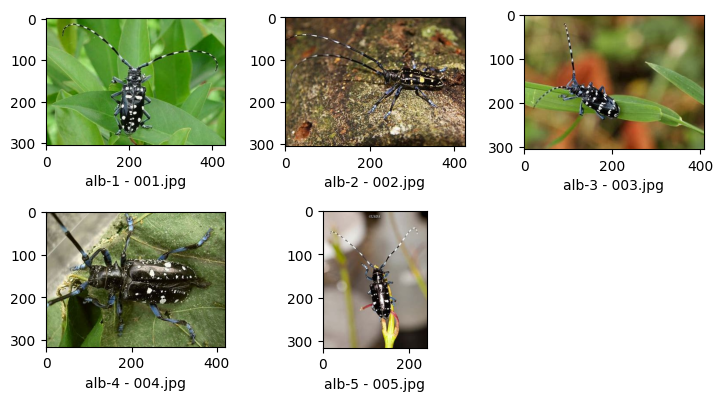

SLF


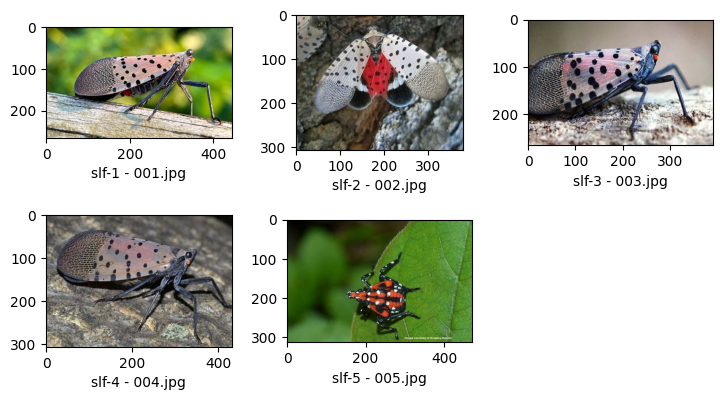

Image from the test dataset representing an image of the actual training data data: alb-1, alb-2, alb-3, alb-4, 
alb-5, slf-1, slf-2, slf-3, slf-4, slf-5  as seen from top to bottom, left to right.

In [ ]:
#- Show pictures of the image dataset

num_images=range_max

caption_start=f"Image from the test dataset representing an image of the actual training data data:"
caption_end = " as seen from top to bottom, left to right."
the_labels=[]

for idx, category in enumerate(categories_short_name):
  print(f"{BOLD_START}{category.upper()}{BOLD_END}")
  # define location of dataset
  folder = TRAIN_DATA_DIR + os.sep + category

  # plot first few images
  for i in range(num_images):
    idx=i+1
    plt.subplot(plot_max + 1 + i)
    filename = folder + os.sep + f'00{idx}{IMG_EXT}'
    actual_filename=os.path.basename(filename)
    plt.tight_layout()
    plt.grid(False)
    the_labels.append(f"{category}-{idx}")
    plt.xlabel(f"{the_labels[-1]} - {actual_filename}")
    image = imread(filename)
    plt.imshow(image)
  plt.show()

caption_labels=", ".join(the_labels)
caption_text = " ".join([caption_start, caption_labels, caption_end])
rprint(caption_text)

## OS Configuration Options

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = str(TF_CPP_MIN_LOG_LEVEL_SETTING)

#To disable GPU access to the current runtime enable -1 for "no GPUs"
#confirmed to work on the Command Line Interface (CLI) of all systems but this one...
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## Compiling the model
To compile the neural network the gradient descent is applied. This is the optimization strategy that reduces the errors as the network is learning. There are various optimization strategies but sgd and adam are common approachs. In the compile stage, we also define the loss function and the metrics. We use sparse categorical cross-entropy because the labels are integers. The categorical cross-entropy is used when the labels are one-hot encoded.

## Hyperparameters

Machine learning algorithms have hyperparameters that can be configured to tailor the algorithm to a specific dataset.

Although the dynamics of many hyperparameters are known, the specific effect they will have on the performance of the resulting model on a given dataset is not known. As such, it is a standard practice to test a suite of values for key algorithm hyperparameters for a chosen machine learning algorithm.

This is called hyperparameter tuning or hyperparameter optimization.

It is common to use a naive optimization algorithm for this purpose, such as a random search algorithm or a grid search algorithm.

Hyperparameter Tuning: Function inputs are algorithm hyperparameters, optimization problems that require an iterative global search algorithm.
For more on this topic, see the tutorial:

Hyperparameter Optimization With Random Search and Grid Search

Nevertheless, it is becoming increasingly common to use an iterative global search algorithm for this optimization problem. A popular choice is a Bayesian optimization algorithm that is capable of simultaneously approximating the target function that is being optimized (using a surrogate function) while optimizing it.

This is desirable as evaluating a single combination of model hyperparameters is expensive, requiring fitting the model on the entire training dataset one or many times, depending on the choice of model evaluation procedure (e.g. repeated k-fold cross-validation).

## Activation Functions

An "activation function" in a neural network is a mathematical function that transforms the weighted sum of inputs received by a neuron into an output signal, essentially deciding whether a neuron should be "activated" or not, allowing the network to learn complex patterns in data by introducing non-linearity to the model; it plays a crucial role in determining the output of a neuron based on its input and is a key component of artificial neural networks.

The choice of activation function can significantly influence the performance of a neural network.

Common examples of activation functions:

+ Sigmoid: Outputs a value between 0 and 1, often used in older neural networks.

+ ReLU (Rectified Linear Unit): Outputs the input if positive, otherwise 0; widely used due to its computational efficiency.

+ Tanh (Hyperbolic Tangent): Outputs a value between -1 and 1.

+ Softmax: Used primarily in the output layer for multi-class classification problems, where it outputs a probability distribution over all classes.

## Optimization Algorithms

Optimization algorithms are the backbone of machine learning models as they enable the modeling process to learn from a given data set. These algorithms are used in order to find the minimum or maximum of an objective function which in machine learning context stands for error or loss.

### Adam
Adam, or Adaptive Moment Estimation, is an optimization algorithm that's used to train deep neural networks in machine learning. It's a combination of the ideas from two other optimization techniques, RMSprop and momentum, and is considered the default algorithm for deep learning.


## Over/Under-fitting

**Overfitting**

In machine learning, overfitting is when a model is too closely trained to a specific set of data, causing it to perform poorly on new data. This can happen when:
+ The model trains for too long on the training data
+ The model is too complex
+ The model memorizes irrelevant information in the training data

An overfitted model is similar to an invention that works well in a lab but not in the real world. It can't make accurate predictions or conclusions from any data other than the training data.

**Underfitting**

Underfitting in machine learning occurs when a model is unable to accurately capture the relationship between input and output data. This can lead to poor model performance and unreliable predictions.

Here are some characteristics of underfitting:
+ High bias
  + Underfit models produce inaccurate results for both the training data and test set.
+ Low variance
  + Underfitting is characterized by low variance.
+ Too simple model
  + Underfitting can occur when a model is too simple, such as a linear regression model trained on a dataset with a polynomial relationship.
+ Not enough training data
  + Underfitting can occur if the model hasn't been trained for long enough or on enough data points.

## References:
+ https://www.tensorflow.org/api_docs/python/tf/keras/activations
+ https://machinelearningmastery.com/why-optimization-is-important-in-machine-learning/
+ https://towardsdatascience.com/understanding-optimization-algorithms-in-machine-learning-edfdb4df766b
+ https://geeksforgeeks.org/optimization-algorithms-in-machine-learning/

## Develop a Baseline CNN Model

A baseline model will establish a minimum model performance to which all of our other models can be compared, as well as a model architecture that we can use as the basis of study and improvement.

A good starting point is the general architectural principles of the VGG models.

### What is the Conv2D Layer?

A "Conv2D" layer in a CNN (Convolutional Neural Network) refers to a 2-dimensional convolutional layer, which applies a set of filters (also called kernels) that slide across the input data (like an image) to extract features by performing element-wise multiplication and summation, essentially creating a new feature map that captures local patterns within the image; it is the primary building block of a CNN for processing 2D data like images, where the convolution operation happens across both the height and width dimensions of the input data.

### Max Pooling?
Max pooling is a technique that reduces the size of an image while keeping the most important information. It's commonly used in convolutional neural networks (CNNs).

### Why Flatten?

The flatten layer typically appears after the convolutional and pooling layers in convolutional neural network (CNN) architectures. It acts as a bridge between the convolutional/pooling layers, which extract spatial features, and the fully connected layers, which perform classification or regression tasks.

In [ ]:
# define cnn model with a single layer
def define_model_1Block():

		model = Sequential()
		model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
		model.add(MaxPooling2D((2, 2)))
		model.add(Flatten())
		model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
		model.add(Dense(2, activation='softmax'))

		# not used, demonstration of additional parameters only
		opt = SGD(learning_rate=0.001, momentum=0.9)

		# compile model
		model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=METRICS)
		model.summary()

		return model

start_t=perf_counter()

try:
	#notice that we're loading the model on an explicit device.
  with tf.device(THE_DEVICE_NAME):
    model1 = define_model_1Block()
except RuntimeError as e:
  print(str(repr(e)))

end_t=perf_counter()
print(f"Model setup time: {end_t - start_t}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 128)               51380352  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 51,381,506
Trainable params: 51,381,506
Non-trainable params: 0
____________________________________________

In [ ]:
# define cnn model with two layers
def define_model_2Block():
		model = Sequential()
		model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
		model.add(MaxPooling2D((2, 2)))
		model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', ))
		model.add(MaxPooling2D((2, 2)))
		model.add(Flatten())
		model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
		model.add(Dense(2, activation='softmax'))

    #Not used, just another example
		#opt = SGD(learning_rate=0.001, momentum=0.9)
		#model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)

		# compile model
		model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)
		model.summary()
		return model

start_t=perf_counter()

try:
  with tf.device(THE_DEVICE_NAME):
    model2 = define_model_2Block()
except RuntimeError as e:
  print(str(repr(e)))

end_t=perf_counter()
print(f"Model setup time: {end_t - start_t}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
# define cnn model with 3 layers
# Adding dropout regularization is a computationally cheap way to regularize a deep neural network.
# Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables
# in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks
# with very different network structures and, in turn, making nodes in the network generally more robust to the inputs.
# https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

def define_model_3Block():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.24))
  model.add(Dense(2,activation='softmax'))

  # compile model
  model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)

  model.summary()
  return model

start_t=perf_counter()

try:
  with tf.device(THE_DEVICE_NAME):
    model3 = define_model_3Block()
except RuntimeError as e:
  print(str(repr(e)))

end_t=perf_counter()
print(f"Model setup time: {end_t - start_t}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
#define a new model using VGG16 with Transfer Learning
def define_model_TransferLearning():
  #transfer learning (VGG16)
  model = VGG16(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

  # mark loaded layers as un-trainable, keep the original weights
  for layer in model.layers:
      layer.trainable = False

  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

  #this layer defines the classification, outputs much match total labels
  output = Dense(2, activation='softmax')(class1)

  # define new model
  model = Model(inputs=model.inputs, outputs=output)

  # optimization
  opt = SGD(learning_rate=0.001, momentum=0.9)

  # compile model
  #model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)
  model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)

  model.summary()
  return model


start_t=perf_counter()

try:
  with tf.device('/job:localhost/replica:0/task:0/device:GPU:0'):
    modelTransfer = define_model_TransferLearning()
except RuntimeError as e:
  print(str(repr(e)))

end_t=perf_counter()
print(f"Transfer learning model setup time: {end_t - start_t}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Data Marshalling and Augmentation

Reference: https://keras.io/examples/vision/image_classification_from_scratch/

Note that embedding the image augmentation within the model build/fit also allows the image manipulations (only available during training, not permanently stored to disk) to benefit from GPU as well.

In [ ]:
print(f"{BOLD_START}Preparing Training Datasets{BOLD_END}")
print('\n')

try:
  with tf.device(THE_DEVICE_NAME):

      # Example code of past Keras 2.0 use.  API upgrades can have drastic impact on existing code.
      """
      #deprecated, use tf.data methods to replace this functionality, see: https://www.tensorflow.org/tutorials/load_data/images
      train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
      #data augmentation is a way to improve results, uncomment this line, replacing train_datagen and re-run your experiment
      train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        rotation_range=45,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        validation_split = .2)
      """

      #see: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
      train_it = keras.utils.image_dataset_from_directory(
          directory=TRAIN_DATA_DIR,
          labels="inferred",
          image_size=(IMG_HEIGHT, IMG_WIDTH),
          batch_size=BATCH_SIZE,
          #class_mode='binary',
          label_mode='categorical',
          #verbose=True,
          #pad_to_aspect_ratio=False,
          #crop_to_aspect_ratio=False,
          #seed=SEED_INIT,
          #shuffle=True,
          #validation_split=VALIDATION_SPLIT,
          #subset="training",
          )

      #deprecated
      #test_it = train_datagen.flow_from_directory(
      test_it = keras.utils.image_dataset_from_directory(
          directory=VALIDATION_DATA_DIR, # same directory as training data
          labels="inferred",
          image_size=(IMG_HEIGHT, IMG_WIDTH),
          batch_size=BATCH_SIZE,
          #class_mode='binary',
          label_mode='categorical',
          #verbose=True,
          #pad_to_aspect_ratio=False,
          #crop_to_aspect_ratio=False,
          #seed=SEED_INIT,
          #shuffle=True,
          #validation_split=VALIDATION_SPLIT,
          #subset="validation",
          )
      #batch size is a hyper-parameter and has influence over training as well.  Larger batch sizes get done faster but take more memory, smaller batch sizes take longer but consume less memory.

except (Exception, RuntimeError) as e:
    print(f"{start}ERROR (Exception encountered):{end} ")
    string = wrapper.fill(text=str(e))
    print(string)

print("")
class_names = test_it.class_names
print(f"{BOLD_START} Class Names (labels){BOLD_END} ##################################")
rprint(class_names)
print("")

# it's a good practice to artificially introduce sample diversity by applying
#random yet realistic transformations to the training images, such as random horizontal
#flipping or small random rotations. This helps expose the model to different aspects of
#the training data while slowing down overfitting.
# Apply `data_augmentation` to the training images, see: https://www.tensorflow.org/tutorials/images/data_augmentation
# Note that this is a CPU intensive operation, see the reference above if you
# want to add this transformation to the GPU instead.

print("Augmenting data...")
data_augmentation_layers = [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1, seed=SEED_INIT,),
    layers.RandomCrop(IMG_HEIGHT, IMG_WIDTH, seed=SEED_INIT,),
    layers.RandomZoom(0.1,seed=SEED_INIT,)


]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


train_it = train_it.map(
                        lambda img, label: (data_augmentation(img), label),
                        num_parallel_calls=tf_data.AUTOTUNE,
)

#prepare the dataset for maximum performance
AUTOTUNE = tf.data.AUTOTUNE

# Prefetching samples in GPU memory helps maximize GPU utilization.
train_it= train_it.prefetch(tf_data.AUTOTUNE)
test_it = test_it.prefetch(tf_data.AUTOTUNE)

end_t=perf_counter()
print(f"Data read setup time: {end_t - start_t}")



Preparing Training Datasets


Found 1947 files belonging to 2 classes.
Found 103 files belonging to 2 classes.

 Class Names (labels) ##################################


['alb', 'slf']


Augmenting data...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Data read setup time: 4.974601206999068


## Epochs

Notice each epoc completion demonstrates an accuracy improvement.  You can add a *patience* function to drop out when your training reaches an optimal level to avoid overfitting.  Additional *drop out* functions are available as well.

In artificial intelligence, an "epoch" refers to a single complete pass of the entire training dataset through a machine learning model, where the model processes every data point once and updates its internal parameters based on that pass, essentially representing one full cycle of learning from the training data; it's a key metric used to measure how many times the model has seen the entire dataset during training.

## Key points about epochs:

+ Full data pass:
An epoch is completed when the model has processed every data point in the training set once.

+ Hyperparameter:
The number of epochs to run is considered a hyperparameter that needs to be tuned for optimal model performance.

+ Batching:
While processing the data, the dataset is often split into smaller batches, and the model updates its parameters after each batch, but one full pass through all batches constitutes an epoch.

### Why epochs matter:

+ Learning progression:
By running multiple epochs, the model can gradually learn more complex patterns from the data.

+ Overfitting risk:
Training for too many epochs can lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new data.

+ Validation monitoring:
To avoid overfitting, it's crucial to monitor the model's performance on a separate validation set after each epoch and stop training when validation accuracy starts to decline.

## Batch-Size

The choice of batch size can have a significant impact on the learning process. A smaller batch size can lead to faster convergence and can help the model escape from local minima. However, it also introduces more noise into the gradient estimate, which can lead to instability in the learning process.

A larger batch size, on the other hand, can provide a more stable learning process and a more accurate gradient estimate. However, it also requires more computational resources and may lead to slower convergence. Furthermore, it may increase the risk of the model getting stuck in local minima.

## Create a Custom Class for Visualization during Model Training

In [ ]:
# custom code designed to plot results real-time as the model trains.
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []


    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        #plot metrics, if accuracy show percent else show sliding scale
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric,
                        )
            if metric=="accuracy":
              axs[i].set_ylim([0.0, 1.0])
              axs[i].set_ylabel("Percent (0.0 - 1.0)")


            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)
                if metric=="val_" + metric:
                  current_ax = plt.gca()
                  axs[i].set_ylim([0.0, 1.0])
                  axs[i].set_ylabel("Percent (0.0 - 1.0)")

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

## What is Loss and Accruacy?

The lower the loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets.

In the case of neural networks, the loss is usually negative log-likelihood and residual sum of squares for classification and regression respectively. Then naturally, the main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks.

Loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s).

The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated.

For example, if the number of test samples is 1000 and model classifies 952 of those correctly, then the model's accuracy is 95.2%.

Precision and recall are metrics used in machine learning to evaluate how well a model performs at identifying positive class samples:

+ **Precision**: The proportion of positive class predictions that are correct.
+ **Recall**: The proportion of actual positive class samples that are identified by the model.

Precision and recall are useful for identifying knowledge gaps in a model, especially when the dataset is imbalanced. However, there is a trade-off between the two metrics, so increasing one will usually decrease the other. For example, if a model has 100% recall, but only 50% precision, then it means that the model correctly identified all positive samples, but also incorrectly classified some other observations as positive.
When choosing between precision and recall, it's important to consider the class balance and the cost of different errors. A common metric that combines both precision and recall is the F-score, which is the harmonic average of the two.

### Define an Early Stopper to prevent Overfitting

In [ ]:
# Create a call back.  A callback is a function that is passed as an argument to another function and
# is executed at a later point in the program

# Simple callback to show results real-time
#callbacks_list = [PlotLearning()]

# Watch the learning after execution
#call this on the CLI after execution: tensorboard --logdir=./folderOnColab/logs
tensorboard_callback = TensorBoard(log_dir="./folderOnColab/logs")

# Another way to increase performance is to stop early, try commenting out the previous callback list
# and uncommenting this one.  See the EPOCHS go from full execution to a shortened cycle.
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# How to you persist your model, how to you deal with overfitting?
mc_callback = ModelCheckpoint('best_model1.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


## Train 1 Block Model

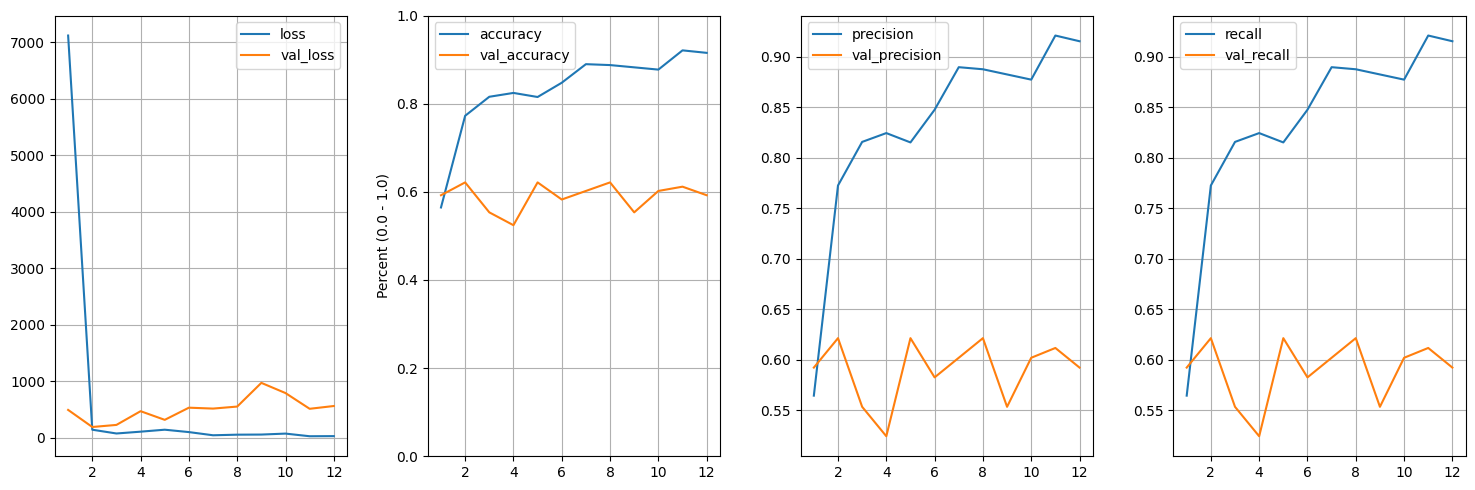


Epoch 12: val_accuracy did not improve from 0.62136
61/61 - 5s - loss: 29.4751 - accuracy: 0.9153 - precision: 0.9153 - recall: 0.9153 - val_loss: 562.2230 - val_accuracy: 0.5922 - val_precision: 0.5922 - val_recall: 0.5922 - 5s/epoch - 83ms/step
Epoch 12: early stopping


Model fit time: 85.0144256550002

In [ ]:
# Configure callbacks (performed per epoch) for this particular model
callbacks_list = [PlotLearning(), es_callback, mc_callback, tensorboard_callback]

try:
  # Ensure you specify the execution hardward
  with tf.device(THE_DEVICE_NAME):
    # fit model, actual training against data, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
    history1 = model1.fit(train_it,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=callbacks_list,
                          validation_data=test_it,
                          validation_split=VALIDATION_SPLIT,
                          class_weight=None,             #you would be a set of weights per category if you had an unbalanced classification problem
                          verbose=2,                     #0 silent, 1 more, 2 max
                          )

except (Exception, RuntimeError) as e:
    process_exception(e)


end_t=perf_counter()
rprint(f"Model fit time: {end_t - start_t}")

## Train Model 2 Block (2 layers)

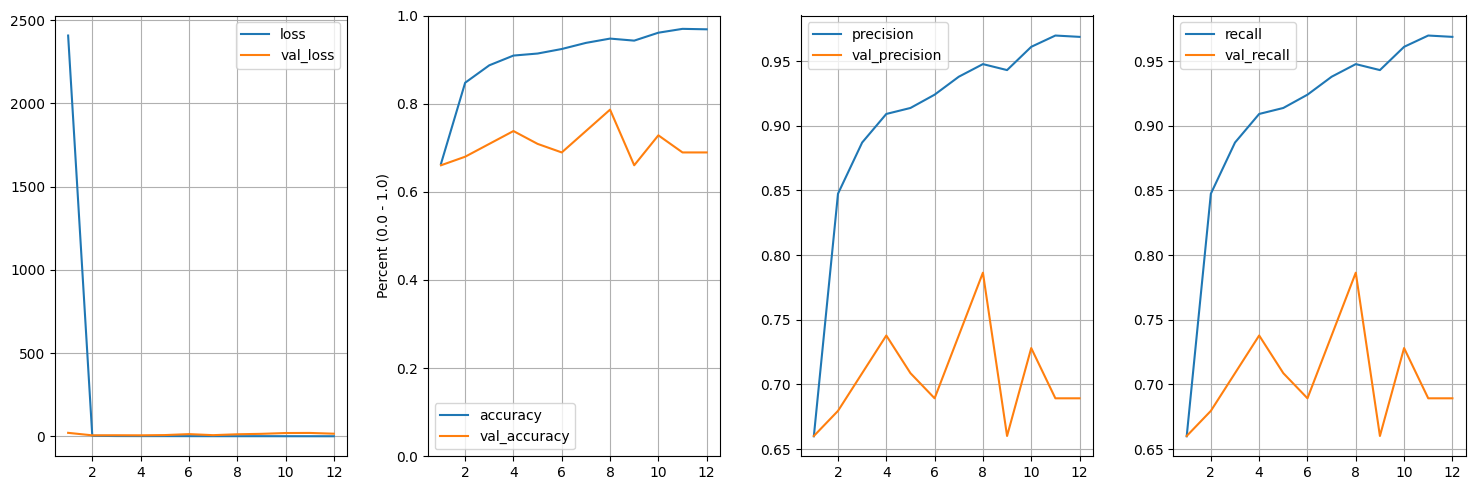


Epoch 12: val_accuracy did not improve from 0.78641
61/61 - 5s - loss: 0.1949 - accuracy: 0.9687 - precision: 0.9687 - recall: 0.9687 - val_loss: 15.5094 - val_accuracy: 0.6893 - val_precision: 0.6893 - val_recall: 0.6893 - 5s/epoch - 88ms/step
Epoch 12: early stopping


Model fit time: 167.46859292900012

In [ ]:
# Configure call backs to include real-time plotting, early stopping, saving models as you go and tensor log saves.
mc_callback = ModelCheckpoint('best_model2.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
callbacks_list = [PlotLearning(), es_callback, mc_callback, tensorboard_callback]

try:
  with tf.device(THE_DEVICE_NAME):
    # fit model, actual training against data, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
    history2 = model2.fit(train_it,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=callbacks_list,
                          validation_data=test_it,
                          validation_split=VALIDATION_SPLIT,
                          class_weight=None,             #you would be a set of weights per category if you had an unbalanced classification problem
                          verbose=2,                     #0 silent, 1 more, 2 max
                          )

except (Exception, RuntimeError) as e:
    process_exception(e)


end_t=perf_counter()
rprint(f"Model fit time: {end_t - start_t}")

## Train Model 3 Block (3 layers)

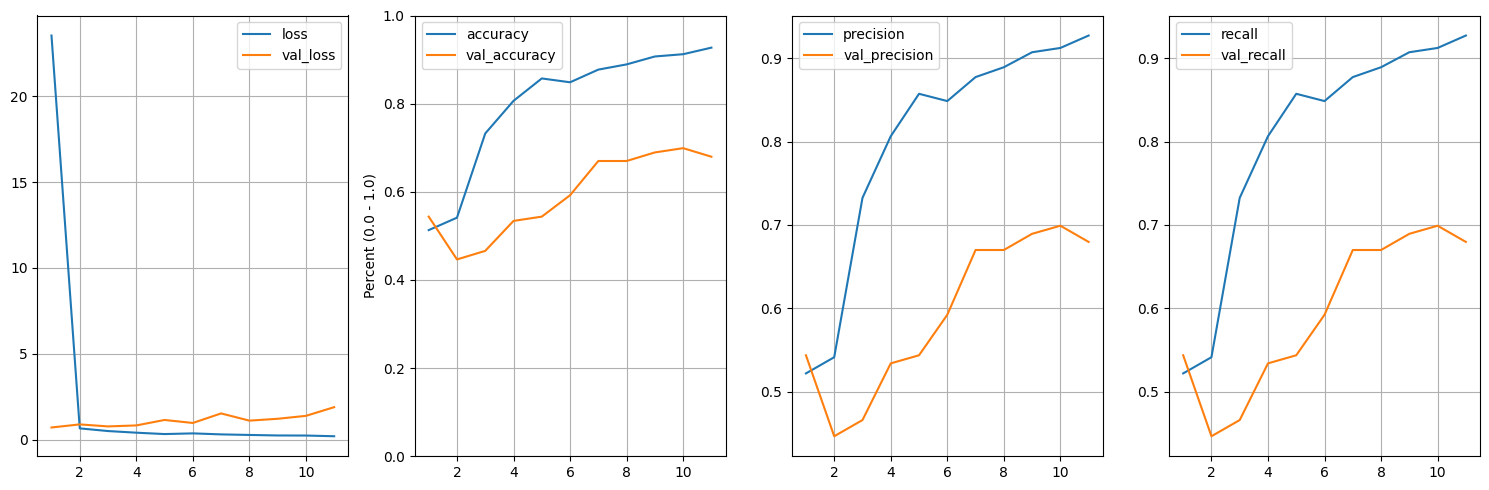


Epoch 11: val_accuracy did not improve from 0.69903
61/61 - 5s - loss: 0.2080 - accuracy: 0.9271 - precision: 0.9271 - recall: 0.9271 - val_loss: 1.9000 - val_accuracy: 0.6796 - val_precision: 0.6796 - val_recall: 0.6796 - 5s/epoch - 84ms/step
Epoch 11: early stopping


Model fit time: 238.0979319380001

In [ ]:
mc_callback = ModelCheckpoint('best_model3.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
callbacks_list = [PlotLearning(), es_callback, mc_callback, tensorboard_callback]

try:
  with tf.device(THE_DEVICE_NAME):
    # fit model, actual training against data, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
    history3 = model3.fit(train_it,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=callbacks_list,
                          validation_data=test_it,
                          validation_split=VALIDATION_SPLIT,
                          class_weight=None,             #you would be a set of weights per category if you had an unbalanced classification problem
                          verbose=2,                     #0 silent, 1 more, 2 max
                          )

except (Exception, RuntimeError) as e:
    process_exception(e)


end_t=perf_counter()
rprint(f"Model fit time: {end_t - start_t}")

## Tranfer Learning Model (VGG 16)

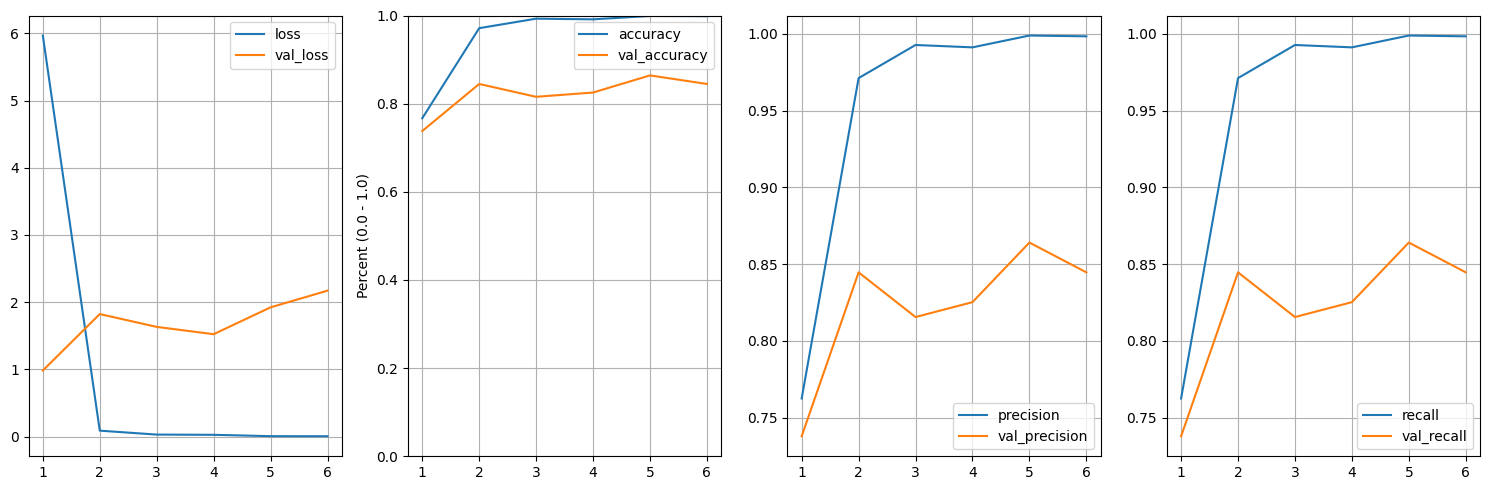


Epoch 6: val_accuracy did not improve from 0.86408
61/61 - 10s - loss: 0.0065 - accuracy: 0.9985 - precision: 0.9985 - recall: 0.9985 - val_loss: 2.1717 - val_accuracy: 0.8447 - val_precision: 0.8447 - val_recall: 0.8447 - 10s/epoch - 169ms/step
Epoch 6: early stopping


Model fit time: 314.69881496200014

In [ ]:
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc_callback = ModelCheckpoint('best_modelVGG16.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

callbacks_list = [PlotLearning(), es_callback, mc_callback, tensorboard_callback]

try:
  with tf.device(THE_DEVICE_NAME):
    # fit model, actual training against data, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
    historyTransfer = modelTransfer.fit(train_it,
                                        batch_size=BATCH_SIZE,
                                        epochs=EPOCHS,
                                        callbacks=callbacks_list,
                                        validation_data=test_it,
                                        validation_split=VALIDATION_SPLIT,
                                        class_weight=None,             #you would be a set of weights per category if you had an unbalanced classification problem
                                        verbose=2,                     #0 silent, 1 more, 2 max
                                       )

except (Exception, RuntimeError) as e:
  process_exception(e)

end_t=perf_counter()
rprint(f"Model fit time: {end_t - start_t}")

In [ ]:
# Plot diagnostic learning curves, additional plotting routines

def summarize_diagnostics_seaborn(history, title):
  # Create pandas DataFrame
  df_history = pd.DataFrame(history.history)
  #print(df_history)

  #turn values into real percents
  df_history['Training_Accuracy'] = df_history["accuracy"] * 100.0
  df_history['Validation_Accuracy'] = df_history["val_accuracy"] * 100.0

  #color palette
  palette = ['r','b','g']

  # Plot using Seaborn
  sns.set_style("darkgrid", {"axes.facecolor": ".9"})
  sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
  fig = plt.figure(figsize=[FIGURE_WIDTH, FIGURE_HEIGHT])
  ax = plt.subplot(111)
  my_plot = sns.lineplot(data=df_history[["Training_Accuracy","Validation_Accuracy"]],
                         markers=True, dashes=False,palette=palette)

  my_plot.set_xlabel('Epochs')
  my_plot.set_ylim(0,100)
  my_plot.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
  my_plot.set_ylabel('Accuracy')

  plt.title('Training and Validation Loss \n' + title)
  ttl = ax.title
  ttl.set_weight('bold')


  plt.show()

In [ ]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=IMG_FONT_SIZE_MIN,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')
	plt.title(metric)
	plt.show()

## Demonstrate Model Performance

  1 Layer Model
4/4 - 0s - loss: 562.2231 - accuracy: 0.5922 - precision: 0.5922 - recall: 0.5922 - 348ms/epoch - 87ms/step


Loss >  562.22

Accuracy >  59.22%

/var/tmp/ipykernel_7906/3157731530.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  my_plot = sns.lineplot(data=df_history[["Training_Accuracy","Validation_Accuracy"]],


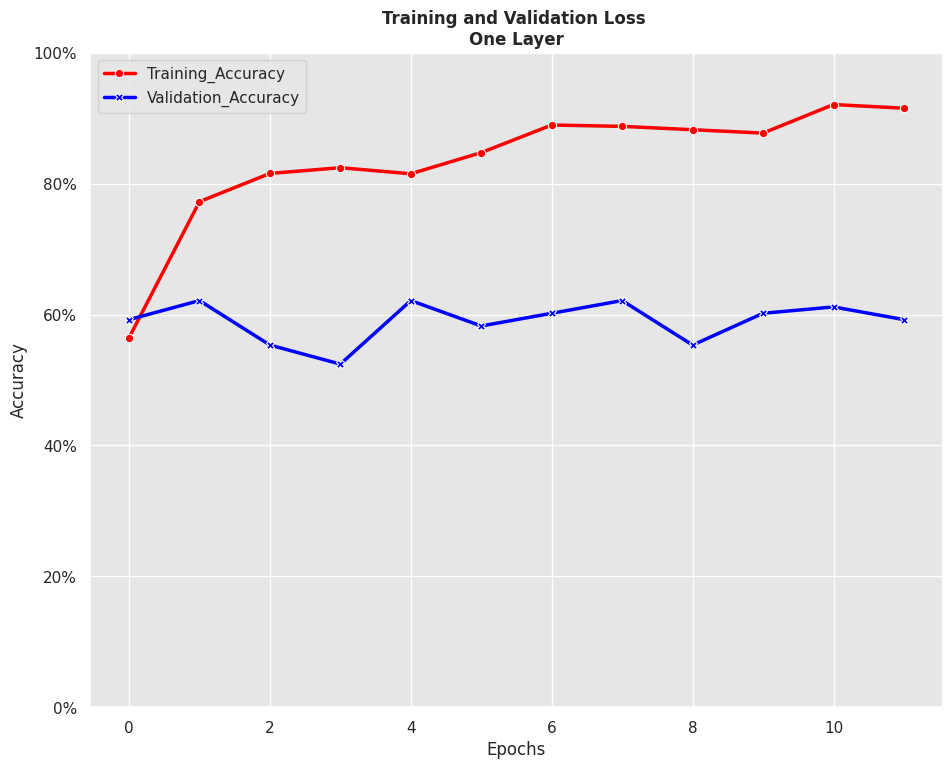

In [ ]:
# model 1
try:
    print(f'  {BOLD_START}1 Layer Model{BOLD_END}')
    loss, accuracy, precision, recall = model1.evaluate(test_it, verbose=2)

    rprint(f'  Loss > {loss: .2f}')
    rprint(f'  Accuracy > {accuracy: .2%}')
    print("\n\n")
    summarize_diagnostics_seaborn(history1, "One Layer")
except Exception as e:
  process_exception(e)



  2 Layer Model


Loss >  15.51

Accuracy >  68.93%

/var/tmp/ipykernel_7906/3157731530.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  my_plot = sns.lineplot(data=df_history[["Training_Accuracy","Validation_Accuracy"]],


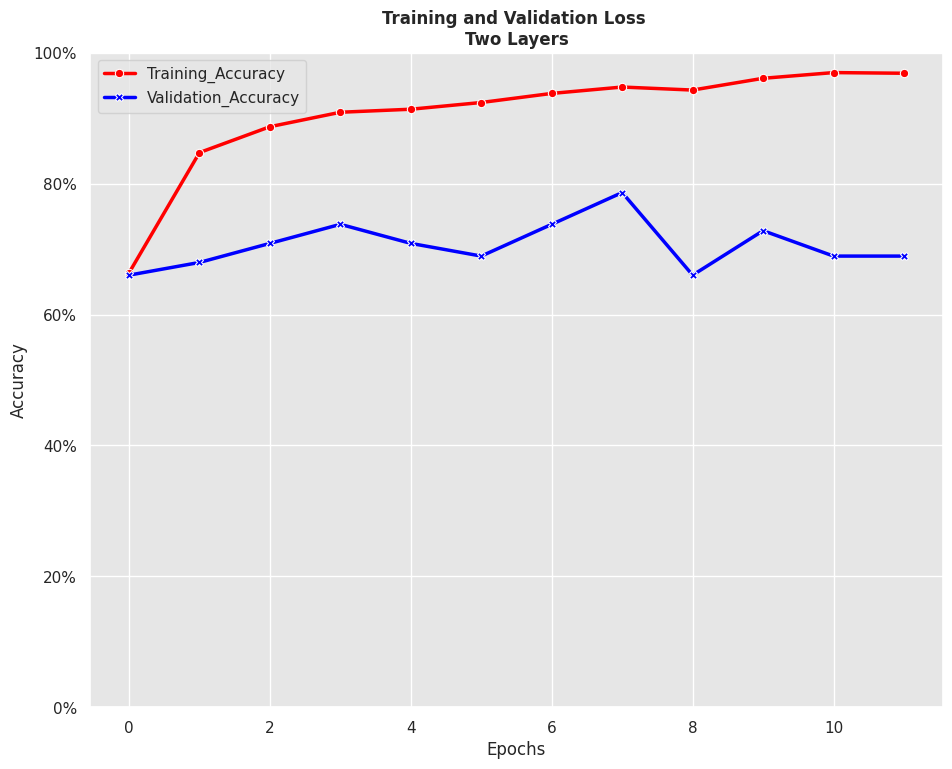

In [ ]:
# Model 2 Layer Configuration Results

print("\n")
print(f'  {BOLD_START}2 Layer Model{BOLD_END}')
loss, accuracy, precision, recall = model2.evaluate(test_it, steps=len(test_it), verbose=0)
rprint(f'  Loss > {loss: .2f}')
rprint(f'  Accuracy > {accuracy: .2%}')
print("\n\n")
summarize_diagnostics_seaborn(history2, "Two Layers")



  3 Layer Model


Loss >  1.90

Accuracy >  67.96%

/var/tmp/ipykernel_7906/3157731530.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  my_plot = sns.lineplot(data=df_history[["Training_Accuracy","Validation_Accuracy"]],


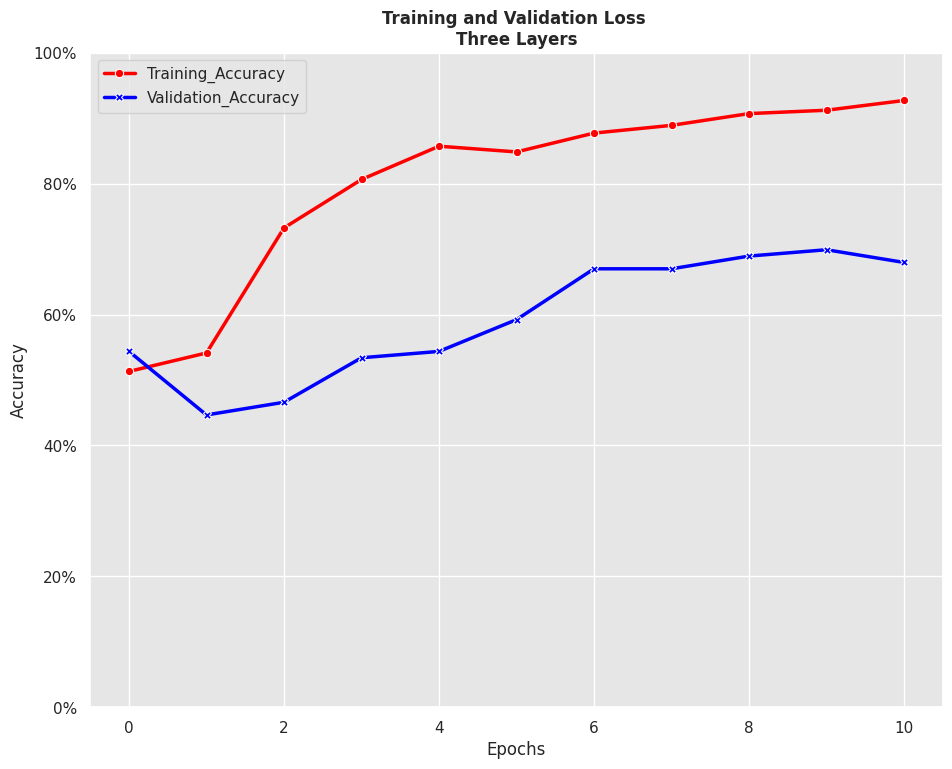

In [ ]:
# Model 3 Layer Configuration Results

print("\n")
print(f'  {BOLD_START}3 Layer Model{BOLD_END}')
loss, accuracy, precision, recall = model3.evaluate(test_it, steps=len(test_it), verbose=0)
rprint(f'  Loss > {loss: .2f}')
rprint(f'  Accuracy > {accuracy: .2%}')
print("\n\n")
summarize_diagnostics_seaborn(history3, "Three Layers")



  VGG16 Model


Loss >  2.17

Accuracy >  84.47%

/var/tmp/ipykernel_7906/3157731530.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  my_plot = sns.lineplot(data=df_history[["Training_Accuracy","Validation_Accuracy"]],


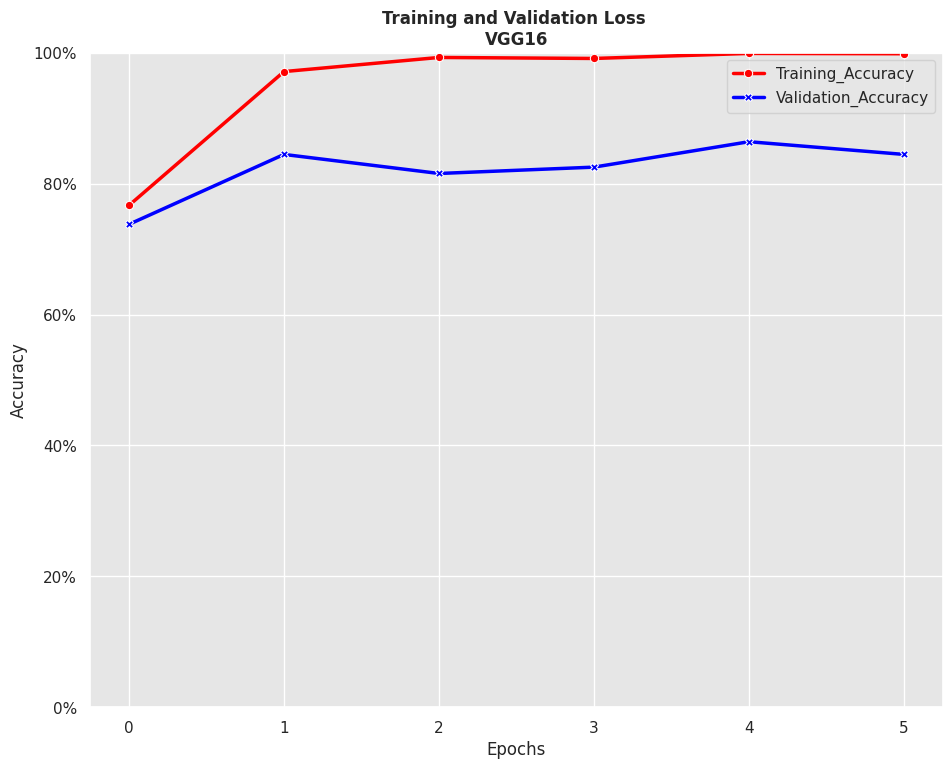

In [ ]:
# Transfer Learning Configuration Results

print("\n")
print(f'  {BOLD_START}VGG16 Model{BOLD_END}')
loss, accuracy, precision, recall = modelTransfer.evaluate(test_it, steps=len(test_it), verbose=0)
rprint(f'  Loss > {loss: .2f}')
rprint(f'  Accuracy > {accuracy: .2%}')
print("\n\n")
summarize_diagnostics_seaborn(historyTransfer, "VGG16")

## Inference

### Load the Models

In [ ]:
print(f"{BOLD_START}Loading saved model definitions and weights.{BOLD_END}")
try:
    best_model1 = load_model('./best_model1.keras')
    best_model2 = load_model('./best_model2.keras')
    best_model3 = load_model('./best_model3.keras')
    best_modelVGG16 = load_model('./best_modelVGG16.keras')
except Exception as e:
    process_exception(e)

Loading saved model definitions and weights.


### Execute your first Inference

Load a sample image.

Obtain an inference from each model.

2025-01-20 20:44:56.256653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8900


1/1 [==============================] - 1s 771ms/step


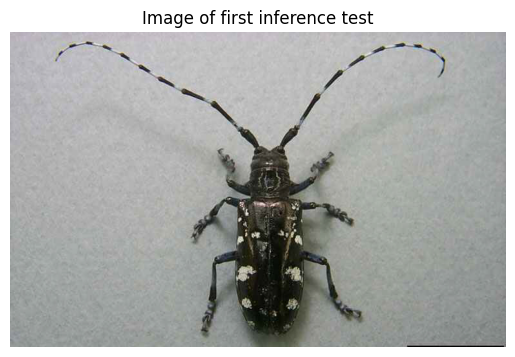

What's in the image?  Share with the class.

In [ ]:
# load and prepare the input image for the newly trained models, simulates your input in the field
def load_image(img):

  #resize the image
  newsize = (IMG_HEIGHT, IMG_WIDTH)
  img1 = img.resize(newsize)

  # convert to array
  img2 = img_to_array(img1)

  # reshape into a single sample with 3 channels
  img = img2.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)

  # ensure datatype
  img = img.astype('float32')

  # scale image, we did this to the training data, you must scale the inference input!!!
  img = img / 255.0
  return img

# load an image and predict the class
def run_example(inc_url, inc_model):

  # load the image
  img = load_image(inc_url)

  # predict the class
  result = inc_model.predict(img)
  return result

rprint("Load a sample image.")
filename="./folderOnColab/ENTOMOLOGY/validation/alb/001.jpg"
#filename="./folderOnColab/ENTOMOLOGY/validation/slf/001.jpg"
img = load_img(filename, target_size=(IMG_HEIGHT, IMG_WIDTH))

rprint("Obtain an inference from each model.")
try:
    results1 = run_example(img, best_model1)
    results2 = run_example(img, best_model2)
    results3 = run_example(img, best_model3)
    resultsVGG16 = run_example(img, best_modelVGG16)
except Exception as e:
    process_exception(e)

the_logo = PIL_Image.open(filename)

#turn the image into a displayed graphic
plt.figure()
plt.title("Image of first inference test")
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.imshow(the_logo)
plt.show()

print("")
rprint("What's in the image?  Share with the class.")

In [ ]:
start=BOLD_START
end=BOLD_END

print(f"{start}Evaluate the Models{end}")
print('\n')


#model 1
try:
  class_names = categories
  predicted_class_index = np.argmax(results1)
  predicted_class = class_names[predicted_class_index]
  print(f'  {start}1 Layer Model{end}')
  print(f'{start}{predicted_class}{end}> {float(results1[0][predicted_class_index]):.2%}')
  print(f'{start}{predicted_class}{end}> {results1}')
except Exception as e:
    process_exception(e)
print('\n')

#model 2
try:
  class_names = categories
  predicted_class_index = np.argmax(results2)
  predicted_class = class_names[predicted_class_index]
  print("\n")
  print(f'  {start}2 Layer Model{end}')
  print(f'{start}{predicted_class}{end}> {float(results2[0][predicted_class_index]):.2%}')
  print(f'{start}{predicted_class}{end}> {results2}')
except Exception as e:
    process_exception(e)
print('\n')

#model 3
try:
  class_names = categories
  predicted_class_index = np.argmax(results3)
  predicted_class = class_names[predicted_class_index]
  print("\n")
  print(f'  {start}3 Layer Model{end}')
  print(f'{start}{predicted_class}{end}> {float(results3[0][predicted_class_index]):.2%}')
  print(f'{start}{predicted_class}{end}> {results3}')
except Exception as e:
  process_exception(e)
print('\n')

#VGG16
try:
  class_names = categories
  predicted_class_index = np.argmax(resultsVGG16)
  predicted_class = class_names[predicted_class_index]
  print("\n")
  print(f'  {start}VGG16 Model{end}')
  print(f'{start}{predicted_class}{end}> {float(resultsVGG16[0][predicted_class_index]):.2%}')
  print(f'{start}{predicted_class}{end}> {resultsVGG16}')
except Exception as e:
  process_exception(e)

print('\n')

Evaluate the Models


  1 Layer Model
ASIAN_LONGHORN_BEETLE> 79.55%
ASIAN_LONGHORN_BEETLE> [[0.7954794  0.20452058]]




  2 Layer Model
ASIAN_LONGHORN_BEETLE> 51.02%
ASIAN_LONGHORN_BEETLE> [[0.5102032  0.48979676]]




  3 Layer Model
ASIAN_LONGHORN_BEETLE> 55.24%
ASIAN_LONGHORN_BEETLE> [[0.55238575 0.4476143 ]]




  VGG16 Model
ASIAN_LONGHORN_BEETLE> 70.32%
ASIAN_LONGHORN_BEETLE> [[0.70318353 0.2968165 ]]




## Inference through Validation Dataset

In [ ]:
# get a list of all validation files
import os
import random

alb_files=os.listdir(f"{WORKING_FOLDER}/ENTOMOLOGY/validation/alb")
slf_files=os.listdir(f"{WORKING_FOLDER}/ENTOMOLOGY/validation/slf")

# divisor, cut down just how many images we show
divisor=3

# determine how many you have
alb_num=len(alb_files)
slf_num=len(slf_files)
rprint(f"There are {alb_num} files in the Asian Longhorn Bettle domain.")
rprint(f"There are {slf_num} files in the Spotted Lantern Fly domain.")

minimal_count = int(min([alb_num, slf_num])/divisor)  #let's not make too many images
rprint(f"There are {minimal_count} total files you can work with in either folder.")
rprint(f"Creating random list of files to choose from.")

# build an array to hold the randomly created names that represent our data we're going to inference
y_true_filenames=[]
y_true = []
y_trueNum=[]
for idx in range(0,minimal_count):
  category_idx=int(random.randrange(0, 2))
  file_idx=int(random.randrange(0,minimal_count))
  if category_idx==0:
    category="alb"
  else:
    category="slf"
  if file_idx < 10:
    filename="00"
  else:
    filename="0"
  the_filename=f"{WORKING_FOLDER}/ENTOMOLOGY/validation/{category}/{filename}{file_idx}.jpg"
  y_true_filenames.append(the_filename)

  y_true.append(class_names[category_idx])
  y_trueNum.append(category_idx)


There are 49 files in the Asian Longhorn Bettle domain.

There are 54 files in the Spotted Lantern Fly domain.

There are 16 total files you can work with in either folder.

Creating random list of files to choose from.

1/1 [==============================] - 0s 22ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[0] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 63.7% 
Iteration[0] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 56.3% 
Iteration[0] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.0% 
Iteration[0] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 63.7% 


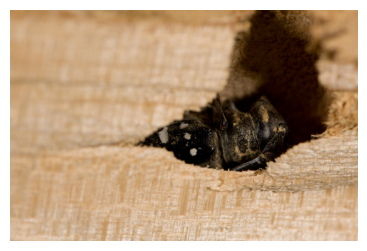

#######################################################################################




1/1 [==============================] - 0s 23ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[1] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 58.1% 
Iteration[1] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 52.4% 
Iteration[1] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.0% 
Iteration[1] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 58.1% 


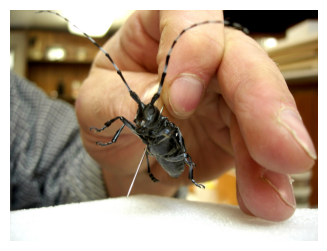

#######################################################################################




1/1 [==============================] - 0s 22ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[2] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 63.7% 
Iteration[2] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 56.3% 
Iteration[2] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.0% 
Iteration[2] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 63.7% 


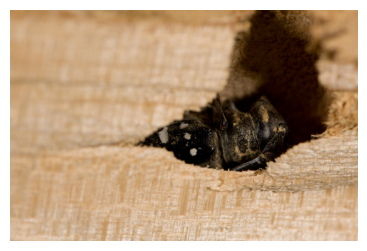

#######################################################################################




1/1 [==============================] - 0s 24ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[3] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 52.9% 
Iteration[3] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 51.1% 
Iteration[3] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.5% 
Iteration[3] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 52.9% 


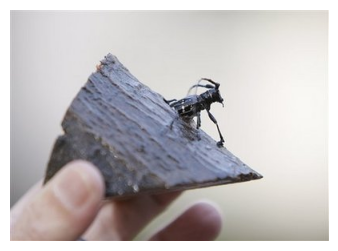

#######################################################################################




1/1 [==============================] - 0s 28ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[4] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 40.5% 
Iteration[4] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 52.3% 
Iteration[4] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.4% 
Iteration[4] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 59.5% 


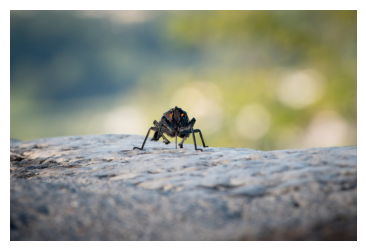

#######################################################################################




1/1 [==============================] - 0s 24ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[5] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.5% 
Iteration[5] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 52.0% 
Iteration[5] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.7% 
Iteration[5] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.5% 


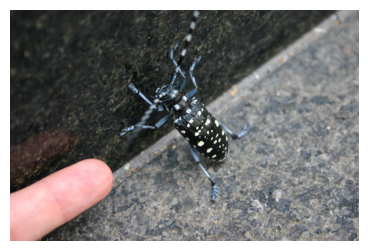

#######################################################################################




1/1 [==============================] - 0s 25ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[6] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 60.2% 
Iteration[6] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 50.1% 
Iteration[6] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.7% 
Iteration[6] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 60.2% 


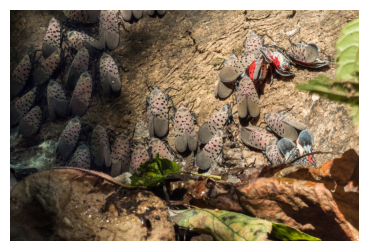

#######################################################################################




1/1 [==============================] - 0s 25ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[7] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 65.0% 
Iteration[7] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 63.5% 
Iteration[7] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.5% 
Iteration[7] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 65.0% 


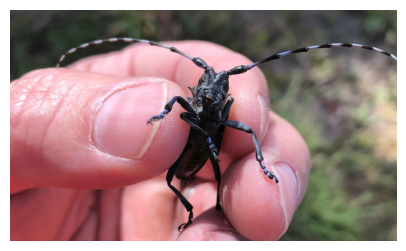

#######################################################################################




1/1 [==============================] - 0s 26ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[8] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 44.3% 
Iteration[8] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 63.0% 
Iteration[8] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 53.1% 
Iteration[8] = VGG16 Predicted class:: SPOTTED_LANTERN_FLY[1], 55.7% 


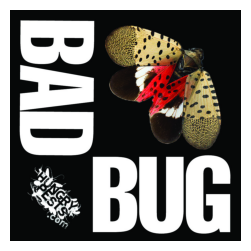

#######################################################################################




1/1 [==============================] - 0s 30ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[9] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 70.3% 
Iteration[9] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 51.0% 
Iteration[9] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.2% 
Iteration[9] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 70.3% 


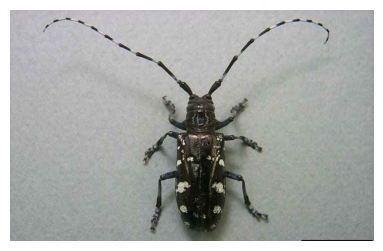

#######################################################################################




1/1 [==============================] - 0s 25ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[10] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 35.4% 
Iteration[10] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 50.2% 
Iteration[10] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.0% 
Iteration[10] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 64.6% 


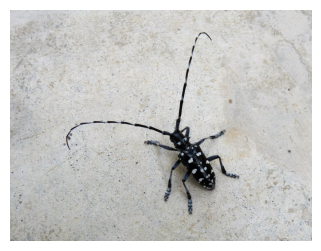

#######################################################################################




1/1 [==============================] - 0s 25ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[11] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 37.8% 
Iteration[11] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 54.2% 
Iteration[11] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 54.6% 
Iteration[11] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 62.2% 


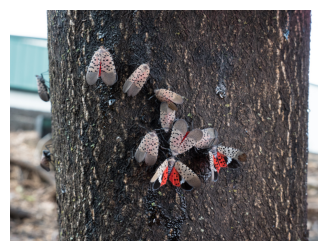

#######################################################################################




1/1 [==============================] - 0s 27ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[12] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.8% 
Iteration[12] = Model#1 Predicted class:: SPOTTED_LANTERN_FLY[1], 52.5% 
Iteration[12] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.6% 
Iteration[12] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.8% 


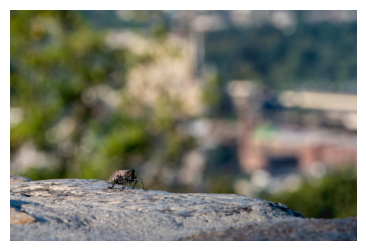

#######################################################################################




1/1 [==============================] - 0s 25ms/step


TRUTH == SPOTTED_LANTERN_FLY

Iteration[13] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.1% 
Iteration[13] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 50.3% 
Iteration[13] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.2% 
Iteration[13] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.1% 


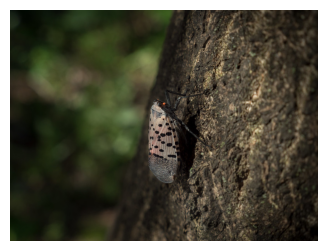

#######################################################################################




1/1 [==============================] - 0s 26ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[14] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 71.4% 
Iteration[14] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 52.6% 
Iteration[14] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.4% 
Iteration[14] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 71.4% 


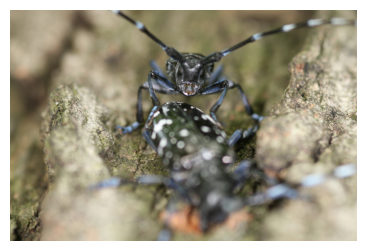

#######################################################################################




1/1 [==============================] - 0s 27ms/step


TRUTH == ASIAN_LONGHORN_BEETLE

Iteration[15] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.5% 
Iteration[15] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 51.3% 
Iteration[15] = Model#1 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 55.2% 
Iteration[15] = VGG16 Predicted class:: ASIAN_LONGHORN_BEETLE[0], 61.5% 


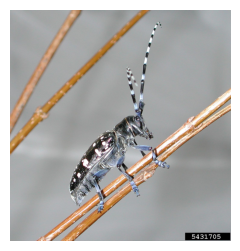

#######################################################################################






In [ ]:
# create arrays to hold the results, think of arrays as a carton is to eggs
y_pred_Model1 = []
y_pred_Model2 = []
y_pred_Model3 = []
y_pred_VGG16 = []

y_predNum_Model1 = []
y_predNum_Model2 = []
y_predNum_Model3 = []
y_predNum_VGG16 = []

class_names = categories

#now iterate through each image, mark the identification, gather the results and produce a confusion matrix to show true quality of the image model
for idx, target_filename, in enumerate(y_true_filenames):
    img = load_img(target_filename, target_size=(IMG_HEIGHT, IMG_WIDTH))
    try:
        results1=run_example(img, best_model1)
    except Exception as e:
        print(f"Model 1 had issues with inference, see: {str(repr(e))}")
        process_exception(e)

    try:
        results2=run_example(img, best_model2)
    except Exception as e:
        print(f"Model 2 had issues with inference, see: {str(repr(e))}")
        process_exception(e)

    try:
        results3=run_example(img, best_model3)
    except Exception as e:
        print(f"Model 3 had issues with inference, see: {str(repr(e))}")
        process_exception(e)

    try:
        resultsVGG16 = run_example(img, best_modelVGG16)
    except Exception as e:
        print(f"Model VGG16 had issues with inference, see: {str(repr(e))}")
        process_exception(e)

    rprint(f"TRUTH == {y_true[idx]}")

    try:
        predicted_class_index = np.argmax(results1)
        y_predNum_Model1.append( predicted_class_index )
        predicted_class = class_names[predicted_class_index]
        y_pred_Model1.append( predicted_class )
        print(f"Iteration[{idx}] = Model#1 {start}Predicted class:{end}: {predicted_class}[{predicted_class_index}], {resultsVGG16[0][predicted_class_index]:.1%} ")
    except Exception as e:
        print(f"Model 1 had issues, see: {str(repr(e))}")
        process_exception(e)


    try:
        predicted_class_index = np.argmax(results2)
        y_predNum_Model2.append( predicted_class_index )
        predicted_class = class_names[predicted_class_index]
        y_pred_Model2.append( predicted_class )
        print(f"Iteration[{idx}] = Model#1 {start}Predicted class:{end}: {predicted_class}[{predicted_class_index}], {results2[0][predicted_class_index]:.1%} ")
    except Exception as e:
        print(f"Model 2 had issues, see: {str(repr(e))}")
        process_exception(e)

    try:
        predicted_class_index = np.argmax(results3)
        y_predNum_Model3.append( predicted_class_index )
        predicted_class = class_names[predicted_class_index]
        y_pred_Model3.append( predicted_class )
        print(f"Iteration[{idx}] = Model#1 {start}Predicted class:{end}: {predicted_class}[{predicted_class_index}], {results3[0][predicted_class_index]:.1%} ")
    except Exception as e:
        print(f"Model 3 had issues, see: {str(repr(e))}")
        process_exception(e)

    try:
        predicted_class_index = np.argmax(resultsVGG16)
        y_predNum_VGG16.append( predicted_class_index )
        predicted_class = class_names[predicted_class_index]
        y_pred_VGG16.append( predicted_class )
        print(f"Iteration[{idx}] = VGG16 {start}Predicted class:{end}: {predicted_class}[{predicted_class_index}], {resultsVGG16[0][predicted_class_index]:.1%} ")
    except Exception as e:
        print(f"Model VGG16 had issues, see: {str(repr(e))}")
        process_exception(e)

    the_logo = PIL_Image.open(target_filename)
    #turn the image into a displayed graphic
    plt.figure(figsize=(5,3))
    plt.axis('off')
    plt.imshow(the_logo)
    plt.show()
    print("#######################################################################################")
    print("\n\n\n")

the_model_names=['Model 1', 'Model 2', 'Model 3', 'VGG16']
the_models=[]
the_models.append(y_pred_Model1)
the_models.append(y_pred_Model2)
the_models.append(y_pred_Model3)
the_models.append(y_pred_VGG16)
the_num_models=[]
the_num_models.append(y_predNum_Model1)
the_num_models.append(y_predNum_Model2)
the_num_models.append(y_predNum_Model3)
the_num_models.append(y_predNum_VGG16)

### Confusion Matrix

The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. For binary classification, these are the True Positive, True Negative, False Positive and False Negative categories.

*The probability score is not reality, or ground truth.* There are four possible outcomes for each output from a binary classifier. For an email spam classifier example, if you lay out the ground truth as columns and the model's prediction as rows:

+ **True positive (TP):** A spam email correctly classified as a spam email. These are the spam messages automatically sent to the spam folder.

+ **False positive (FP):** A not-spam email misclassified as spam. These are the legitimate emails that wind up in the spam folder.

+ **False negative (FN):** A spam email misclassified as not-spam. These are spam emails that aren't caught by the spam filter and make their way into the inbox.

+ **True negative (TN):** A not-spam email correctly classified as not-spam. These are the legitimate emails that are sent directly to the inbox.

#### Choice of metric and tradeoffs

The metric(s) you choose to prioritize when evaluating the model and choosing a threshold depend on the costs, benefits, and risks of the specific problem.

Metric Guidance

**Accuracy**

+ Use as a rough indicator of model training progress/convergence for balanced datasets.

+ For model performance, use only in combination with other metrics.

+ Avoid for imbalanced datasets. Consider using another metric.

**Recall**

+ (True positive rate) - Use when false negatives are more expensive than false positives.

+ False positive rate - Use when false positives are more expensive than false negatives.

**Precision**

+ Use when it's very important for positive predictions to be accurate.


#### References:

+ https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
+ https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [ ]:
def make_confusion_classification_output(inc_cm,
                                         inc_cr : str,
                                         inc_model_name : str,
                                         inc_labels : []
                                        ) -> None:

    cf=inc_cm
    plt.rcParams['figure.figsize'] = (FIGURE_WIDTH/1.5, FIGURE_HEIGHT/1.5)
    plt.xticks(fontsize=IMG_FONT_SIZE_MIN * 0.75)
    plt.yticks(fontsize=IMG_FONT_SIZE_MIN * 0.75)
    plt.title(f'Confusion Matrix for Invasive Species - {inc_model_name}', fontsize=IMG_FONT_SIZE_MIN * 1.25)

    group_names= inc_labels
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf,annot=labels,fmt="",cmap='Blues',cbar=True,xticklabels=categories,yticklabels=categories,annot_kws={"size": IMG_FONT_SIZE_MIN})
    caption_text=f"""Confusion Matrix, for: {inc_model_name} with {minimal_count} random samples from the validation dataset with the following metrics: \n{inc_cr}"""
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Saving plot
    target_filename=f"""{WORKING_FOLDER}/STEM-004_ConfusionMatrix_{inc_model_name}{IMG_EXT}"""
    plt.savefig(target_filename, transparent=False, dpi=150);
    add_alt_text(target_filename, caption_text);
    plt.close()

    #Now show the image
    image = mpimg.imread(target_filename)
    # Display the image
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    #make_accessible(plt, jinja2.Template(caption_text), len=len)
    rprint(caption_text)
    print("################################################################################")
    plt.close()

Processing Model 1:

...calculating confusion matrix.

...calculating classification report.

...creating confusion matrix graph.

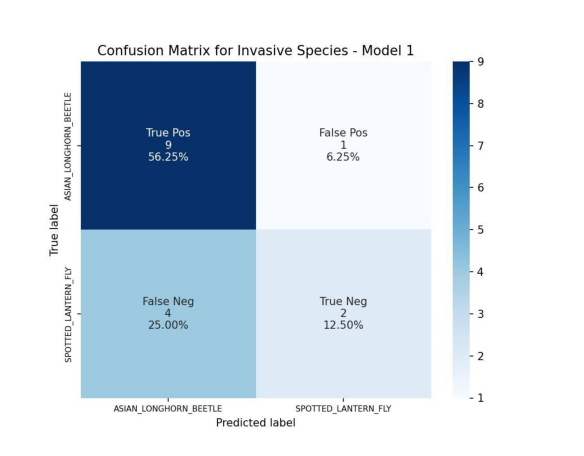

Confusion Matrix, for: Model 1 with 16 random samples from the validation dataset with the following metrics: 
                       precision    recall  f1-score   support

ASIAN_LONGHORN_BEETLE       0.69      0.90      0.78        10
  SPOTTED_LANTERN_FLY       0.67      0.33      0.44         6

             accuracy                           0.69        16
            macro avg       0.68      0.62      0.61        16
         weighted avg       0.68      0.69      0.66        16

################################################################################


Processing Model 2:

...calculating confusion matrix.

...calculating classification report.

...creating confusion matrix graph.

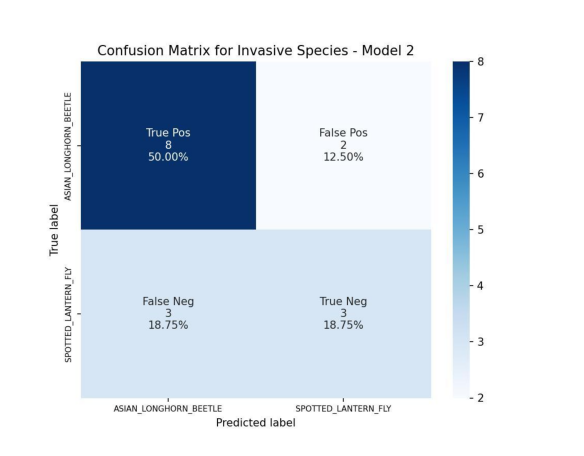

Confusion Matrix, for: Model 2 with 16 random samples from the validation dataset with the following metrics: 
                       precision    recall  f1-score   support

ASIAN_LONGHORN_BEETLE       0.73      0.80      0.76        10
  SPOTTED_LANTERN_FLY       0.60      0.50      0.55         6

             accuracy                           0.69        16
            macro avg       0.66      0.65      0.65        16
         weighted avg       0.68      0.69      0.68        16

################################################################################


Processing Model 3:

...calculating confusion matrix.

...calculating classification report.

/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


...creating confusion matrix graph.

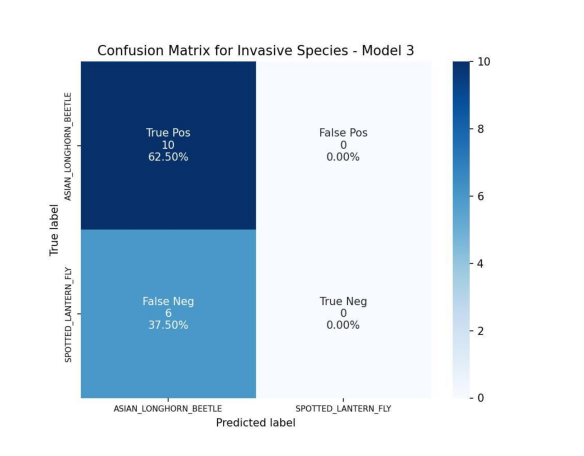

Confusion Matrix, for: Model 3 with 16 random samples from the validation dataset with the following metrics: 
                       precision    recall  f1-score   support

ASIAN_LONGHORN_BEETLE       0.62      1.00      0.77        10
  SPOTTED_LANTERN_FLY       0.00      0.00      0.00         6

             accuracy                           0.62        16
            macro avg       0.31      0.50      0.38        16
         weighted avg       0.39      0.62      0.48        16

################################################################################


Processing VGG16:

...calculating confusion matrix.

...calculating classification report.

...creating confusion matrix graph.

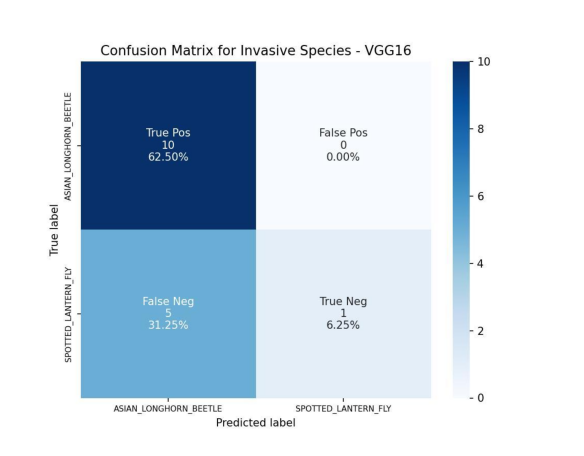

Confusion Matrix, for: VGG16 with 16 random samples from the validation dataset with the following metrics: 
                       precision    recall  f1-score   support

ASIAN_LONGHORN_BEETLE       0.67      1.00      0.80        10
  SPOTTED_LANTERN_FLY       1.00      0.17      0.29         6

             accuracy                           0.69        16
            macro avg       0.83      0.58      0.54        16
         weighted avg       0.79      0.69      0.61        16

################################################################################


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve

#build the confusion matrices
cms={}
cr={}
group_names = ["True Pos","False Pos","False Neg","True Neg"]

for idx, the_model in enumerate(the_models):
    rprint(f"Processing {the_model_names[idx]}:")
    try:
        rprint("...calculating confusion matrix.")
        cms[the_model_names[idx]] = confusion_matrix(y_true,the_model, labels=class_names)
    except Exception as e:
        process_exception(e)

    try:
        rprint("...calculating classification report." )
        cr[the_model_names[idx]]=classification_report(y_true, the_model)
    except Exception as e:
        process_exception(e)

    rprint("...creating confusion matrix graph.")

    make_confusion_classification_output(cms[the_model_names[idx]], cr[the_model_names[idx]], the_model_names[idx], group_names)

### Receiver Operating Characteristic (ROC) / Area Under the Curve (AUC)

ROC stands for Receiver Operating Characteristic, and it's a curve that shows how well a machine learning model performs at different classification thresholds. ROC curves are a key tool in machine learning and predictive analytics.

In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

How ROC curves work

+ True positive rate (TPR) - The proportion of actual positives that the model correctly identifies. TPR is also known as sensitivity or recall.
+ False positive rate (FPR) - The proportion of actual negatives that the model incorrectly identifies as positives. FPR is also known as the fall-out or probability of false alarm.

Area under the curve (AUC) is the overall performance of the classifier, which is calculated by measuring the area under the ROC curve. A larger AUC indicates a better classifier. The area under the ROC curve (AUC) represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative.  AUC is a number between 0.0 and 1.0 representing a binary classification model's ability to separate positive classes from negative classes. The closer the AUC is to 1.0, the better the model's ability to separate classes from each other.


Why ROC curves are important

+ ROC curves are useful for comparing the performance of different classifiers.
+ The initial slope of the ROC curve shows how quickly the performance degrades.
+ ROC curves are a fundamental tool for evaluating the quality of classifier output.



### References:

+ https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
+ https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02
+ https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

Processing Model 1:

...calculating ROC/AUC.

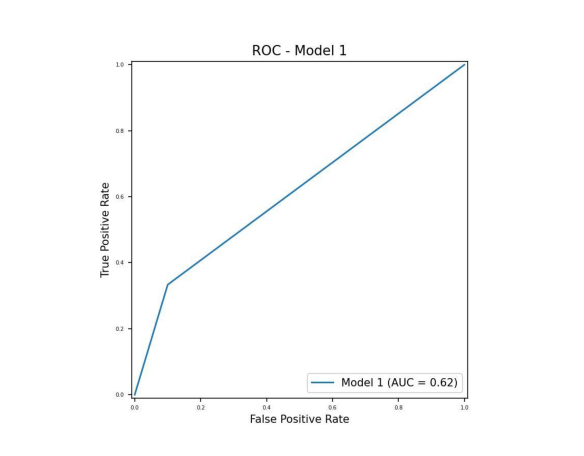

ROC, for: Model 1 with 16 random samples from the validation dataset.

################################################################################


Processing Model 2:

...calculating ROC/AUC.

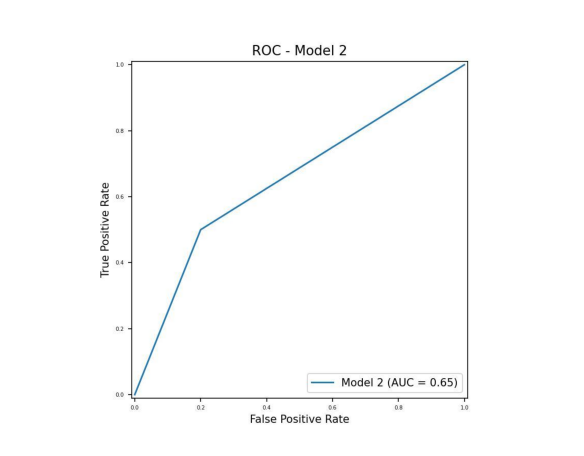

ROC, for: Model 2 with 16 random samples from the validation dataset.

################################################################################


Processing Model 3:

...calculating ROC/AUC.

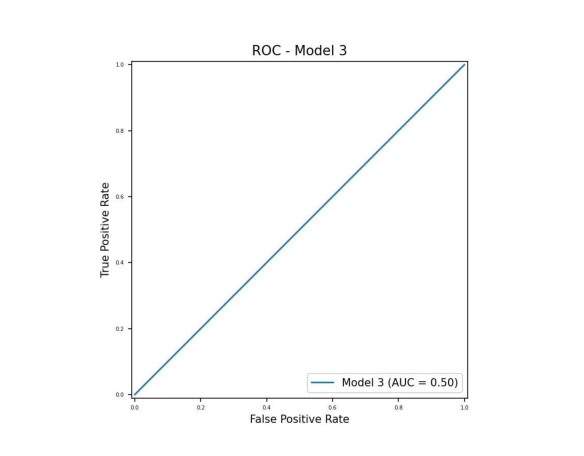

ROC, for: Model 3 with 16 random samples from the validation dataset.

################################################################################


Processing VGG16:

...calculating ROC/AUC.

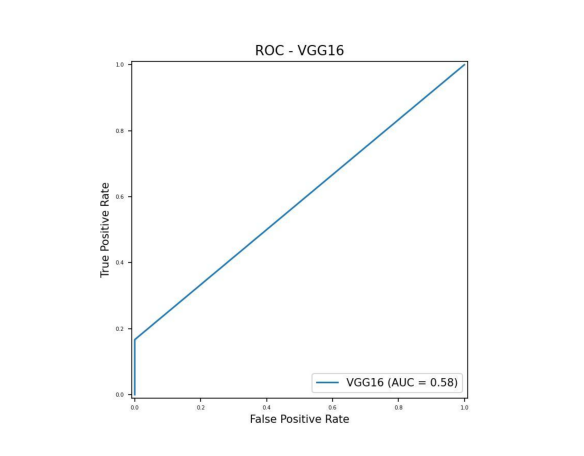

ROC, for: VGG16 with 16 random samples from the validation dataset.

################################################################################


In [ ]:
from sklearn import datasets, metrics, model_selection, svm

for idx, the_model in enumerate(the_num_models):
    rprint(f"Processing {the_model_names[idx]}:")
    try:
        rprint("...calculating ROC/AUC.")
        fpr, tpr, thresholds = metrics.roc_curve(y_trueNum, the_model,)
        roc_auc=metrics.auc(fpr, tpr)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=the_model_names[idx], )
        display.plot()
        plt.rcParams['figure.figsize'] = (FIGURE_WIDTH/1.5, FIGURE_HEIGHT/1.5)
        plt.xticks(fontsize=IMG_FONT_SIZE_MIN * 0.5)
        plt.yticks(fontsize=IMG_FONT_SIZE_MIN * 0.5)
        plt.title(f'ROC - {the_model_names[idx]}', fontsize=IMG_FONT_SIZE_MIN * 1.25)
        caption_text=f"""ROC, for: {the_model_names[idx]} with {minimal_count} random samples from the validation dataset."""

        # Saving plot
        target_filename=f"""{WORKING_FOLDER}/STEM-004_ROC_{the_model_names[idx]}{IMG_EXT}"""
        plt.savefig(target_filename, transparent=False, dpi=150);
        add_alt_text(target_filename, caption_text);
        plt.close()

        #Now show the image
        image = mpimg.imread(target_filename)
        # Display the image
        plt.axis('off')
        plt.imshow(image)
        plt.show()
        rprint(caption_text)
        print("################################################################################")
        plt.close()
    except Exception as e:
        process_exception(e)




In [ ]:

try:
    #best_model1, best_model2, best_model3, best_modelTransfer
    target_model='best_model1'
    target_filename=f'{WORKING_FOLDER}/STEM-005_{target_model}{IMG_EXT}'
    tf.keras.utils.plot_model(
        load_model(target_model+'.keras'),
        to_file=target_filename,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=True,
        dpi=96,
    )
except Exception as e:
    process_exception(e)



try:
  img=PIL_Image.open(target_filename)
  img.show()
except Exception as e:
    process_exception(e)



We trust you have received the usual lecture from the local System
Administrator. It usually boils down to these three things:

    #1) Respect the privacy of others.
    #2) Think before you type.
    #3) With great power comes great responsibility.

[sudo] password for jupyter: 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError(2, 'No such file or directory')

# Advanced Class

Exercise the following requirements:

1. Utilize a configuration management schema to hold your hyper-parameters.
2. Utilize a hyper-parameter search for a more optimally performing model.
3. Updating the dataset is another acceptable mechanism for model improvement.


## Tips for Hyperparameter Optimization

This section lists some handy tips to consider when tuning hyperparameters of your neural network.

+ k-fold Cross Validation. You can see that the results from the examples in this post show some variance. A default cross-validation of 3 was used, but perhaps k=5 or k=10 would be more stable. Carefully choose your cross validation configuration to ensure your results are stable.

+ Review the Whole Grid. Do not just focus on the best result, review the whole grid of results and look for trends to support configuration decisions.

+ Parallelize. Use all your cores if you can, neural networks are slow to train and we often want to try a lot of different parameters. Consider spinning up a lot of AWS instances.

+ Use a Sample of Your Dataset. Because networks are slow to train, try training them on a smaller sample of your training dataset, just to get an idea of general directions of parameters rather than optimal configurations.

+ Start with Coarse Grids. Start with coarse-grained grids and zoom into finer grained grids once you can narrow the scope.

+ Do not Transfer Results. Results are generally problem specific. Try to avoid favorite configurations on each new problem that you see. It is unlikely that optimal results you discover on one problem will transfer to your next project. Instead look for broader trends like number of layers or relationships between parameters.

+ Reproducibility is a Problem. Although we set the seed for the random number generator in NumPy, the results are not 100% reproducible. There is more to reproducibility when grid searching wrapped Keras models than is presented in this post.

Why do most CNN models not apply the cross-validation technique?

K-fold cross-validation is often used for simple models with few parameters, models with more basic hyperparameters and the models are easy to optimize. Some examples of simple models are: linear regression, logistic regression, small neural networks, support vector machines, etc... For a CNN, due to its many parameters ther are too many possible changes in the architecture. Normally you experiment with the learning rate, batch size, dropout (amount and position) and batch normalization (position). Training a CNN with a sufficiently large dataset can take quite a long time.

#### Reference:

+ https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
+ https://medium.com/@AIandInsights/hyperparameter-tuning-with-keras-and-gridsearchcv-a-comprehensive-guide-46214cc0d999
+ https://medium.com/@sengupta.joy4u/how-to-decide-the-hyperparameters-in-cnn-bfa37b608046
+ https://keras.io/keras_tuner/api/tuners/grid/
+ https://www.kaggle.com/code/pramodiasuka/cnn-model-with-kfold-cross-validation

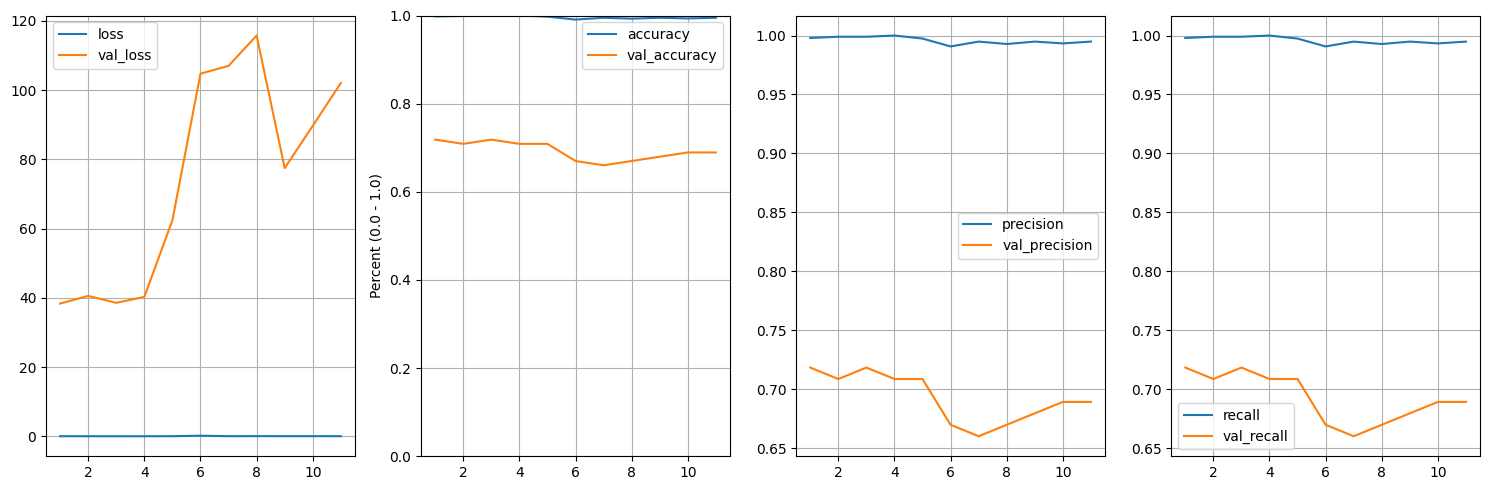


Epoch 11: val_accuracy did not improve from 0.71845
61/61 - 5s - loss: 0.0194 - accuracy: 0.9949 - precision: 0.9949 - recall: 0.9949 - val_loss: 102.0316 - val_accuracy: 0.6893 - val_precision: 0.6893 - val_recall: 0.6893 - 5s/epoch - 85ms/step
Epoch 11: early stopping


In [ ]:
# Ugly attempt a parameterization of hyper-parameters using looping structure
# Should use Keras Classification Search but data will have to be transformed into numpy arrays
# Results aren't being saved either so... who did the best???
"""
# Define model function
def create_model(inc_optimizer='adam', inc_activation='relu'):

 #transfer learning (VGG16)
  model = VGG16(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

  # mark loaded layers as un-trainable, keep the original weights
  for layer in model.layers:
      layer.trainable = False

  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

  #this layer defines the classification, outputs much match total labels
  output = Dense(2, activation=inc_activation)(class1)

  # define new model
  model = Model(inputs=model.inputs, outputs=output)

  # compile model
  #model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=METRICS)
  model.compile(optimizer=inc_optimizer, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

  return model

# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'batch_size': [8, 16, 32, 54, 128],
}

# Create KerasClassifier

try:
  with tf.device('/job:localhost/replica:0/task:0/device:GPU:0'):
      for idx, optimizer in enumerate(param_grid['optimizer']):
            for idx2, activation in enumerate(param_grid['activation']):
                for idx2, batch_size in enumerate(param_grid['batch_size']):
                    model=create_model(inc_optimizer=optimizer, inc_activation=activation)
                    rprint(f"Optimizer: {optimizer:10} - Activation Function: {activation:10} - Batch Size: {batch_size}")
                    try:
                        mc_callback = ModelCheckpoint(f"best_VGG16_{optimizer}_{activation}_{batch_size}.keras", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
                        callbacks_list = [PlotLearning(), es_callback, mc_callback, tensorboard_callback]
                        history1 = model1.fit(train_it,
                                              batch_size=batch_size,
                                              epochs=EPOCHS,
                                              callbacks=callbacks_list,
                                              validation_data=test_it,
                                              validation_split=VALIDATION_SPLIT,
                                              verbose=2,                     #0 silent, 1 more, 2 max
                                             )
                    except Exception as inner_exception:
                        process_exception(inner_exception)

except Exception as e:
    process_exception(e)

"""